# FashionMNIST

![gif](assets/embedding.gif)


You should solve the FashionMNIST problems and be able to recognize clothes thanks to AI.

	If necessary you can un-comment the next line and run it to install this notebook depedencies

In [1]:
pip install torch torchvision numpy matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import torch
from torchvision import datasets, transforms
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Transform each image into tensor
transform = transforms.Compose([transforms.ToTensor()])

# Set the training loader
train_data = datasets.FashionMNIST('../data', train=True, download=True, transform=transform)
# Set the testing loader
test_data = datasets.FashionMNIST('../data', train=False, download=True, transform=transform)

# The dataset

 - `train_data` is only for training your model.
 - `test_data`  is only for testing your model.

## Shape

```python
train_data = [
	[image], [label] # 1st example
	[image], [label] # 2nd example
	[image], [label] # 3rd example
	[image], [label] # 4th example
	... # 4th example
]
```

There's 60 000 examples in the train set, and 10 000 in the test set

### Image

An image is 28*28 in black & white 

You can access the first image this way:

```python
image_0 = data[0][0]
```

### Label

A label is an integer between 0 and 9 (included) 

You can access the first label this way:

```python
label_0 = data[0][0]
```

Here is the detail of each label

| Label | Description |
|:-|:-:|
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |



In [4]:
print("Train len : " + str(len(test_data)))
print("Test len : " + str(len(train_data)))

Train len : 10000
Test len : 60000


In [5]:
print("Image Size: " + str(train_data[0][0].shape))

Image Size: torch.Size([1, 28, 28])


In [6]:
label_dic = {
	0: "T-shirt/top",
	1: "Trouser",
	2 : "Pullover ",
	3 : "Dress ",
	4 : "Coat ",
	5 : "Sandal ",
	6 : "Shirt ",
	7 : "Sneaker ",
	8 : "Bag ",
	9 : "Ankle boot"
}

def plot_one_example(example):
	plt.imshow(example[0].view(28, 28), cmap="gray")
	plt.title("Label class {}: {}".format(example[1], label_dic[example[1]]))
	plt.show()

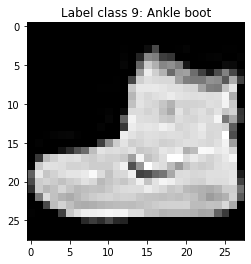

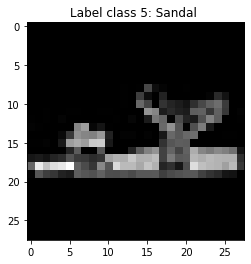

In [7]:
plot_one_example(train_data[0])
plot_one_example(train_data[-1])

In [8]:
weights = torch.randn(784, 10, requires_grad=True)
test_dataset = torch.utils.data.DataLoader(test_data)
train_dataset = torch.utils.data.DataLoader(train_data)

print(weights.shape)


def test_accuracy(weights, data_test):
    test_size = len(data_test.dataset)
    correct = 0

    for (data, target) in data_test:
        # print(batch_idx, data.shape, target.shape)
        data = data.view((-1, 28*28))
        # print(batch_idx, data.shape, target.shape)

        activations = torch.matmul(data, weights)
        softmax = F.softmax(activations, dim=1)
        prediction = softmax.argmax(dim=1, keepdim=True)
        correct_predictions = prediction.eq(target.view_as(prediction)).sum().item()
        correct += correct_predictions
    accuracy = correct / test_size
    print(f"accuracy: on test: {accuracy*100}%")

# test_accuracy(weights, test_dataset)

torch.Size([784, 10])


In [9]:
iteration = 0
for (data, target) in train_dataset:

    if weights.grad is not None:
        weights.grad.zero_()
    data = data.view((-1, 28*28))
    # print(data.shape, target.shape)
    activations = torch.matmul(data, weights)
    # print(activations.shape)
    log_softmax = F.log_softmax(activations, dim=1)
    print(log_softmax)

    loss = F.nll_loss(log_softmax, target)
    print("\r",loss.item(), end=' ')

    loss.backward()

    with torch.no_grad():
        weights -= 0.1*weights.grad
    iteration += 1

    # if not it % 100:
    #     test_accuracy(weights, test_dataset)

    if iteration > 25:
        break


tensor([[-2.4860e+01, -2.3821e+01, -3.5873e+01, -3.3630e+01, -3.0140e-03,
         -2.6871e+01, -2.5266e+01, -3.5418e+01, -2.8377e+01, -5.8060e+00]],
       grad_fn=<LogSoftmaxBackward0>)
 5.806004047393799 tensor([[-7.6683e+00, -2.1020e+01, -4.0584e+01, -2.7074e+01, -5.3638e+01,
         -2.3314e+01, -3.8092e+01, -4.8193e+01, -1.6929e+01, -4.6755e-04]],
       grad_fn=<LogSoftmaxBackward0>)
 7.668314456939697 tensor([[ -2.9914,  -0.0517, -16.5679, -10.6942, -18.4943, -23.2623,  -9.6788,
         -18.4869,  -9.9860, -16.3015]], grad_fn=<LogSoftmaxBackward0>)
 2.991375207901001 tensor([[-4.0531e-06, -1.2403e+01, -3.2763e+01, -2.3966e+01, -3.0695e+01,
         -2.6777e+01, -2.0986e+01, -3.8080e+01, -1.9318e+01, -2.7998e+01]],
       grad_fn=<LogSoftmaxBackward0>)
 23.966018676757812 tensor([[-2.5365e-04, -1.8006e+01, -2.4618e+01, -8.2960e+00, -3.0166e+01,
         -4.5310e+01, -2.1849e+01, -4.0065e+01, -1.5155e+01, -1.2479e+01]],
       grad_fn=<LogSoftmaxBackward0>)
 0.00025364520843140

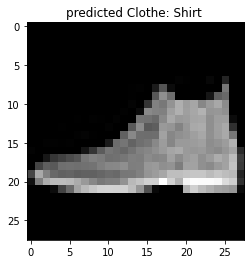

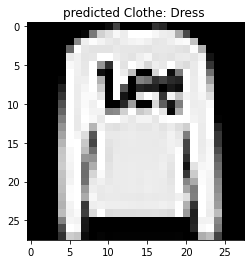

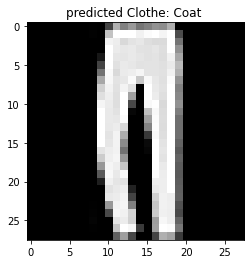

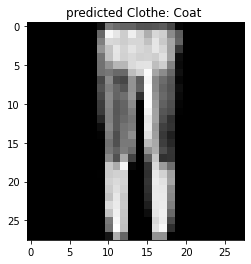

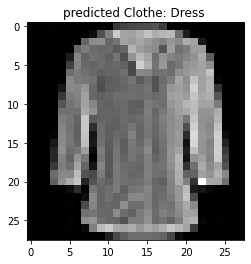

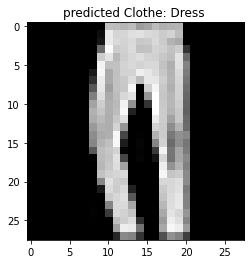

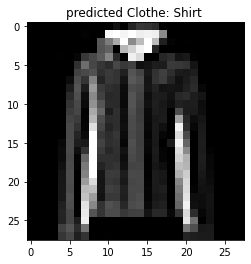

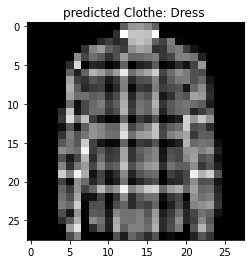

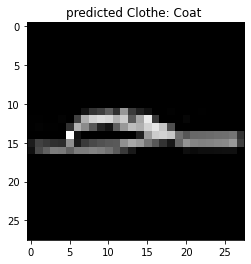

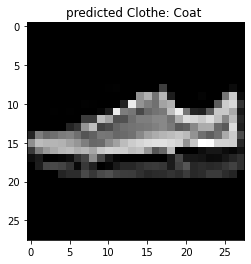

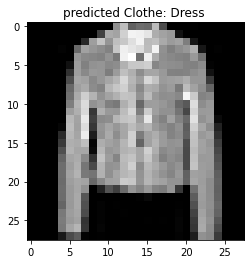

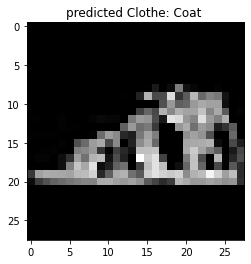

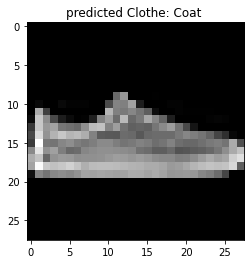

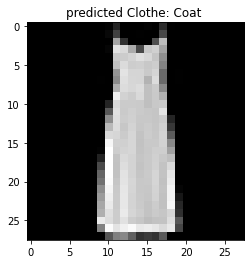

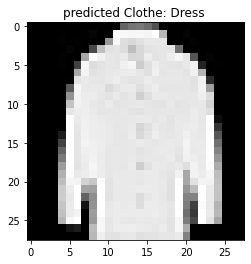

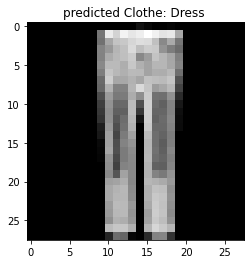

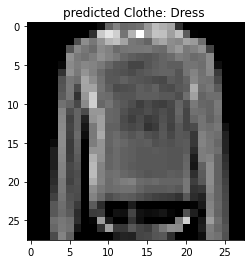

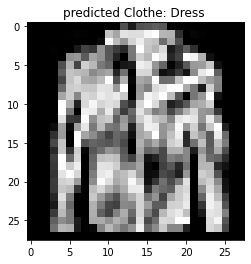

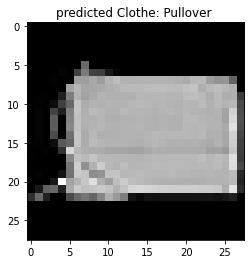

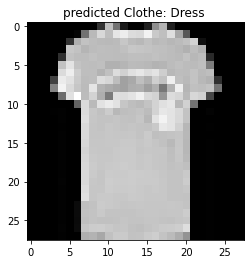

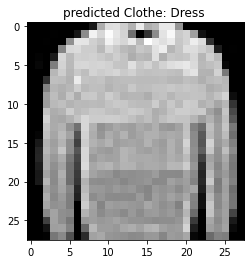

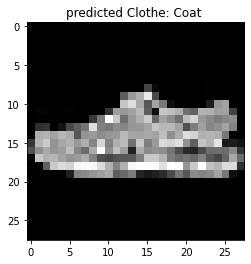

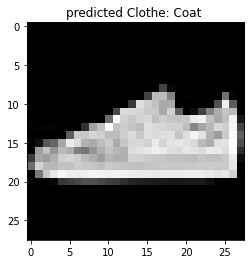

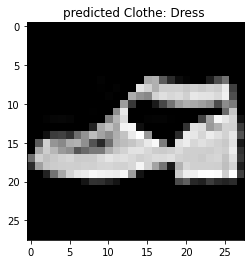

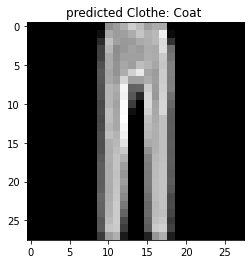

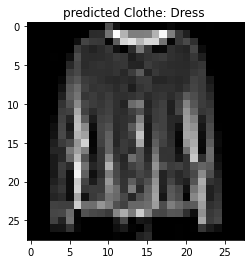

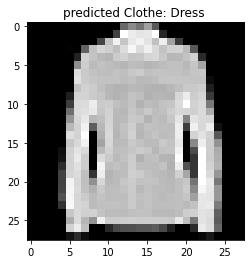

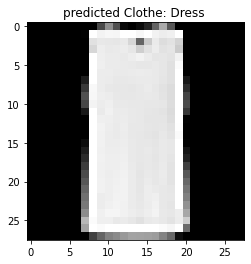

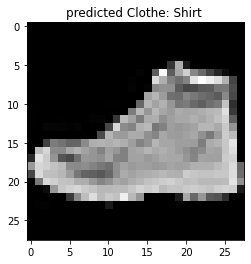

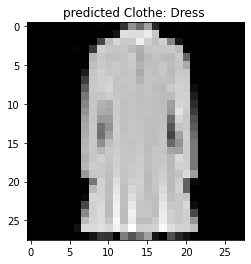

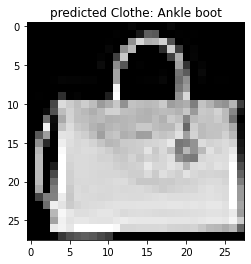

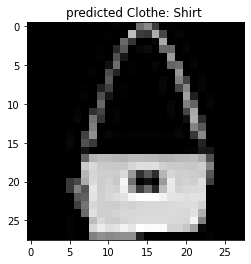

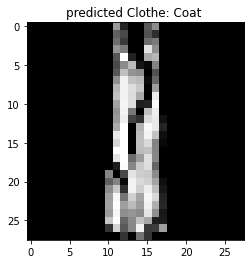

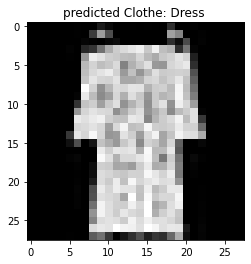

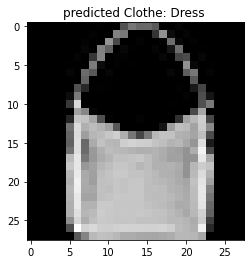

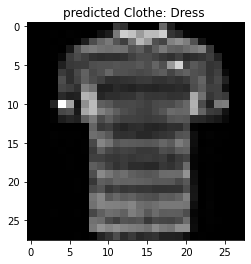

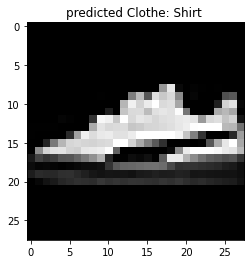

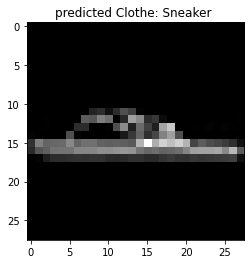

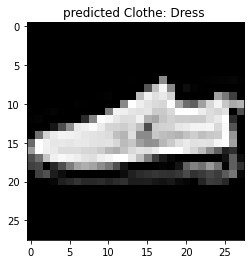

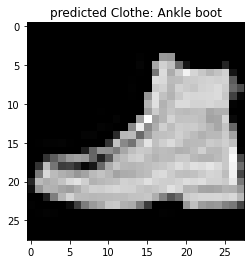

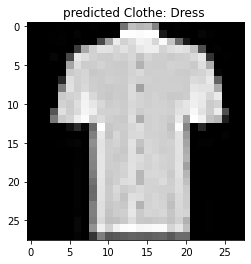

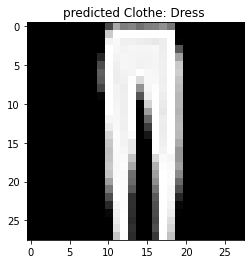

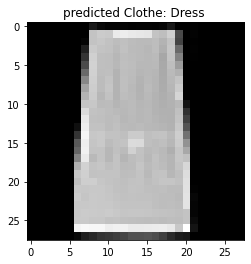

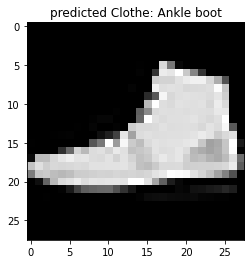

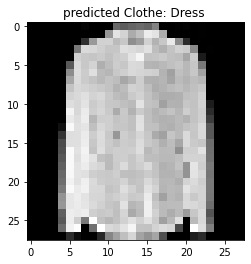

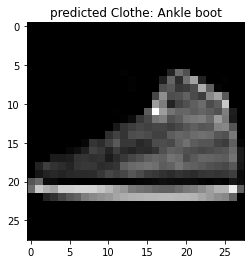

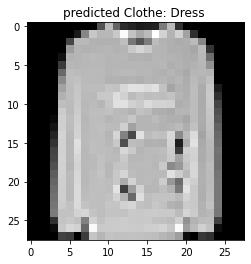

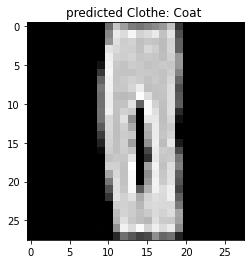

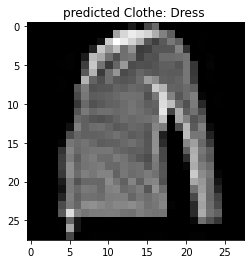

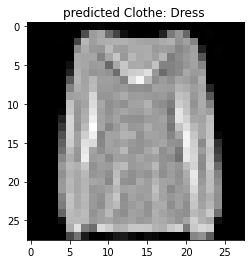

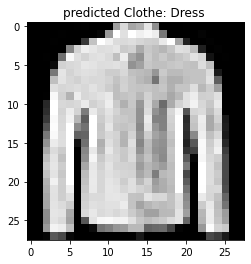

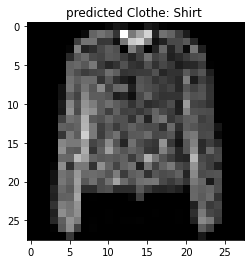

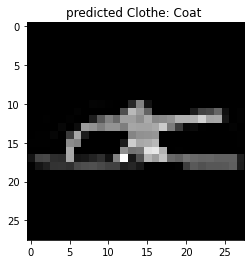

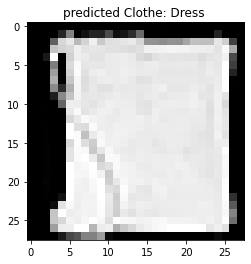

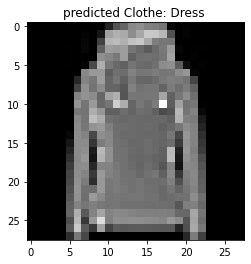

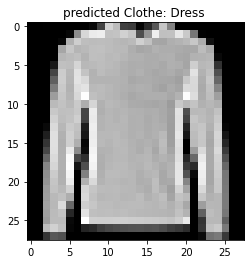

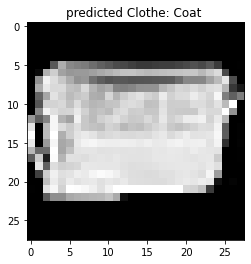

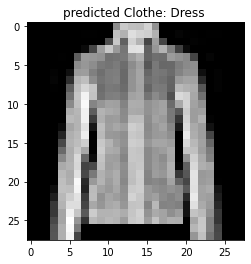

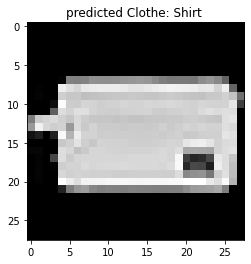

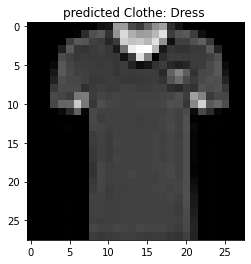

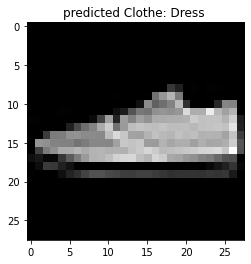

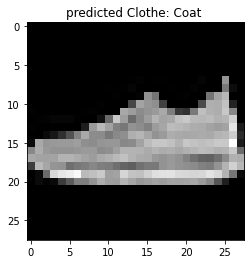

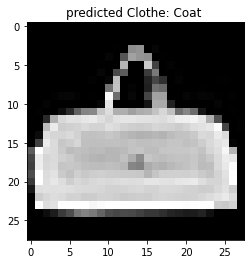

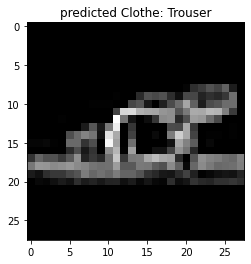

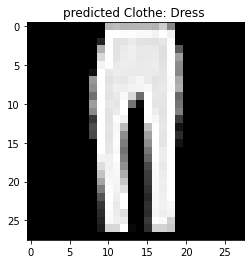

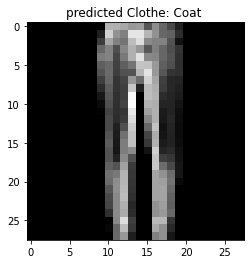

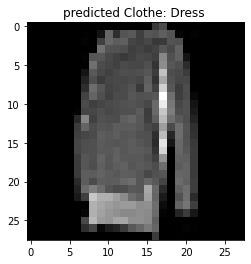

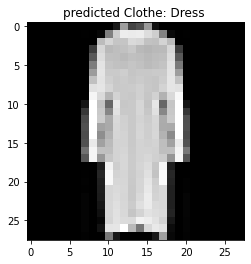

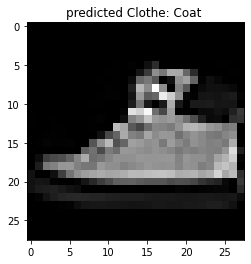

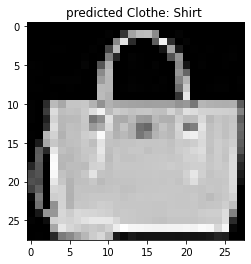

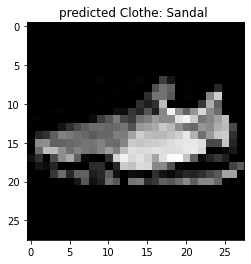

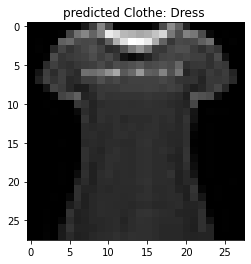

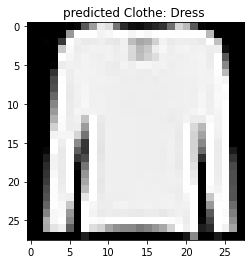

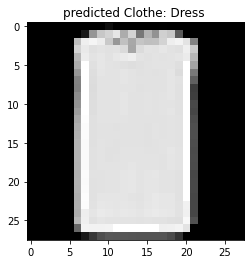

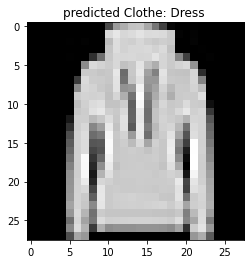

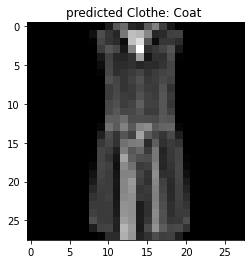

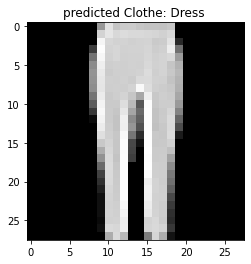

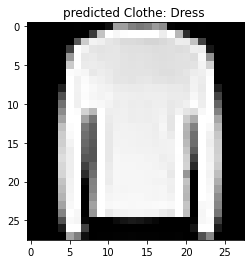

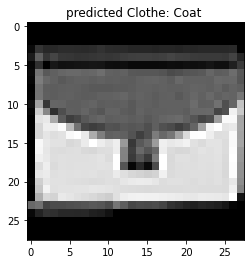

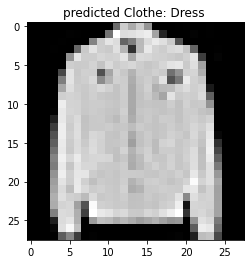

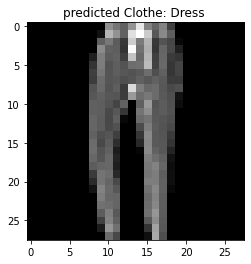

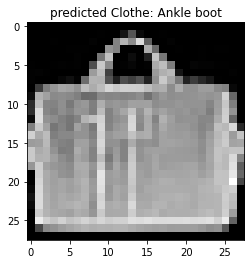

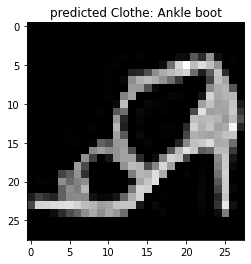

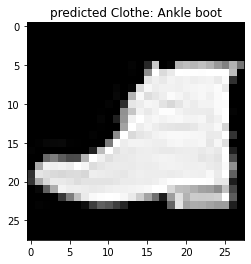

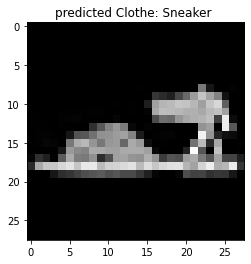

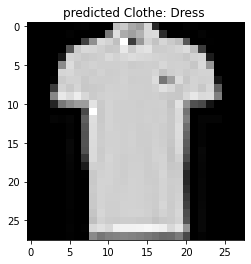

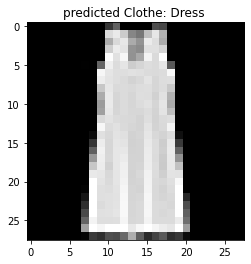

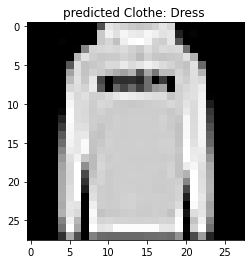

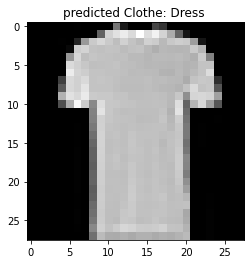

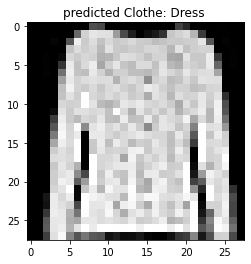

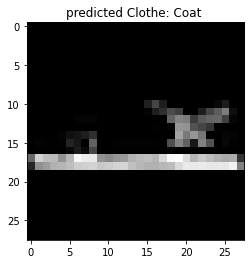

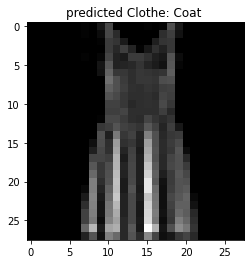

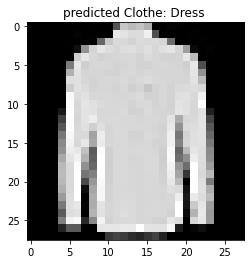

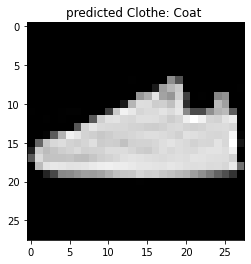

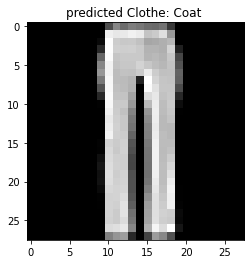

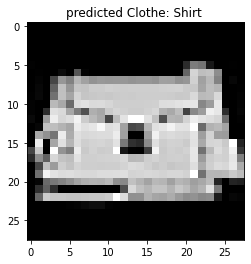

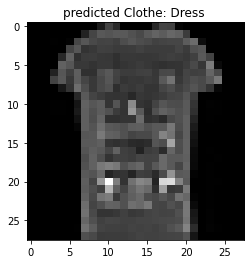

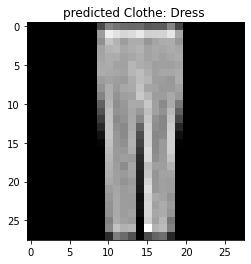

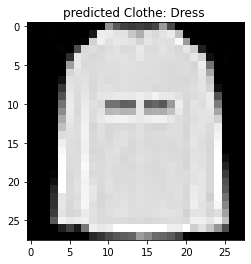

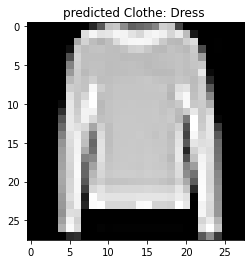

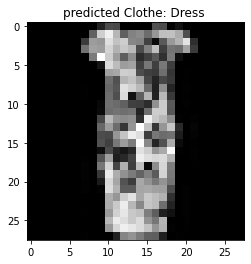

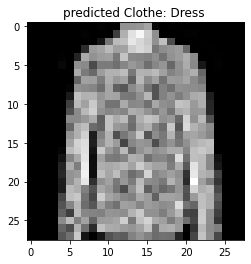

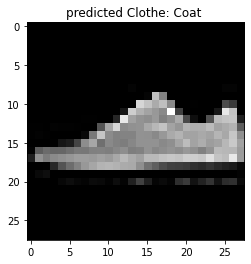

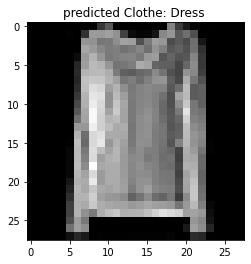

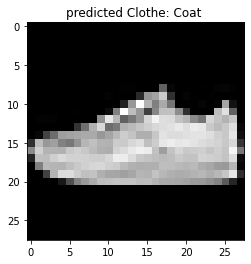

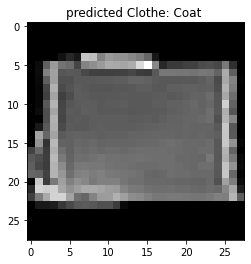

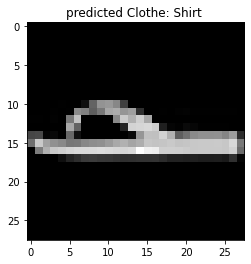

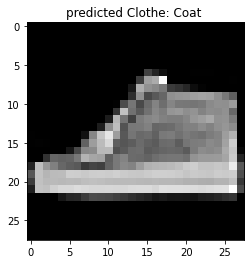

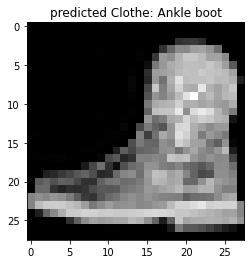

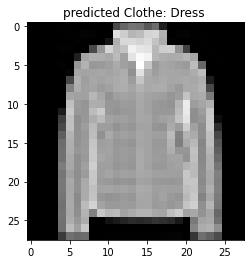

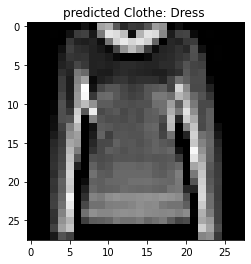

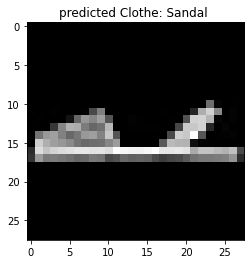

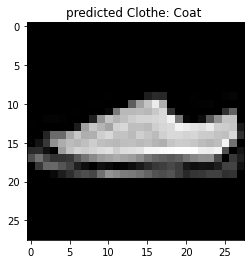

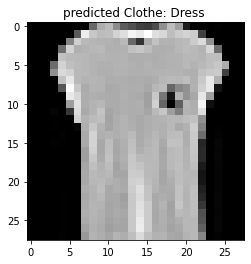

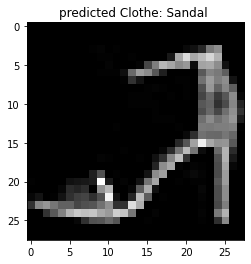

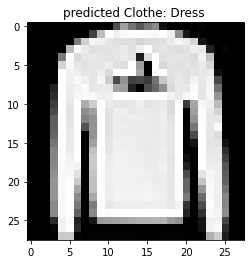

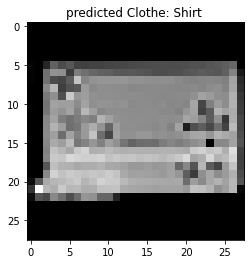

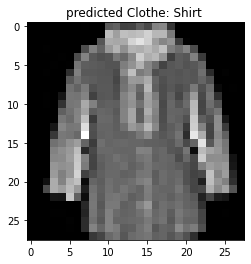

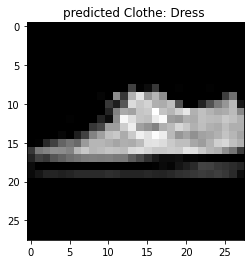

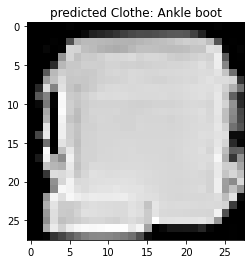

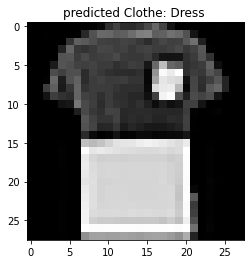

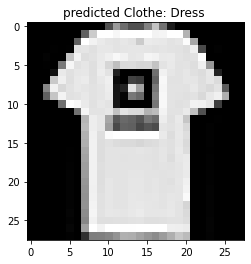

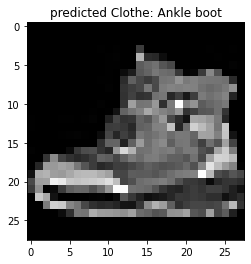

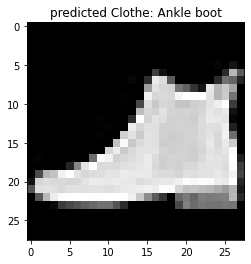

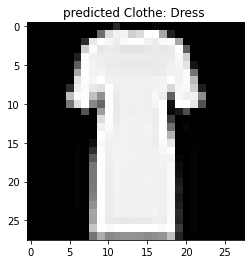

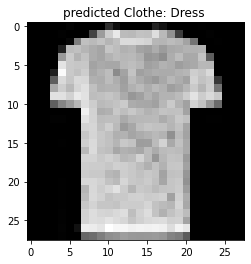

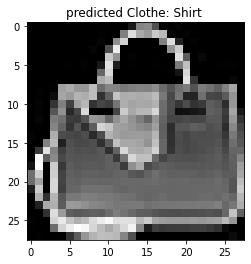

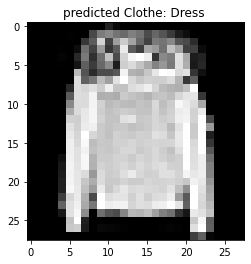

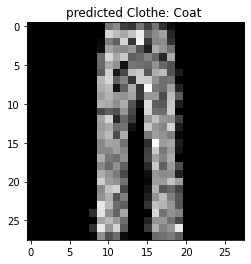

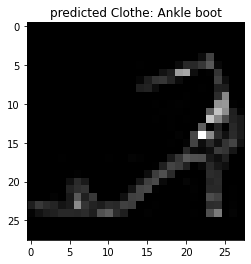

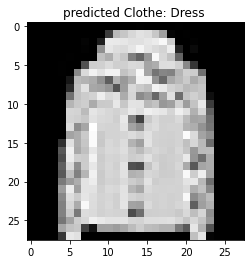

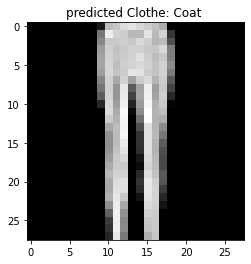

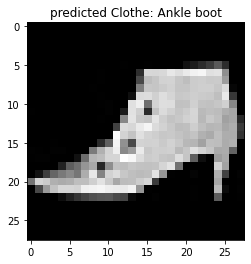

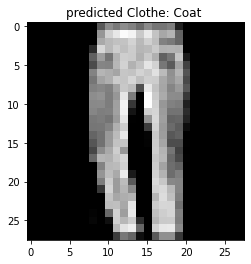

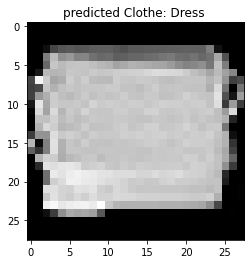

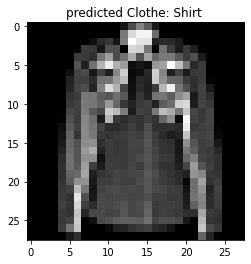

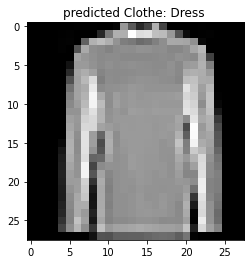

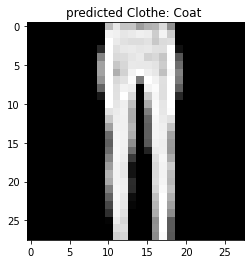

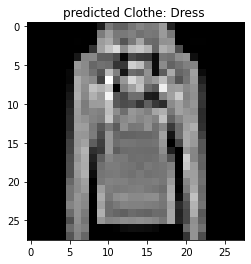

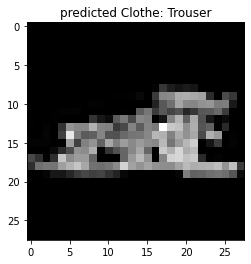

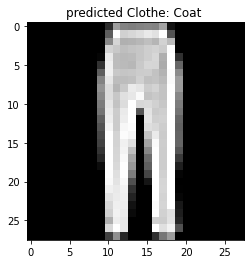

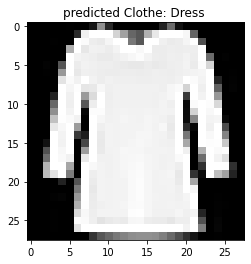

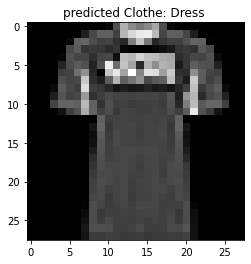

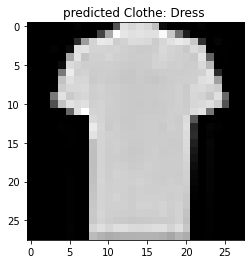

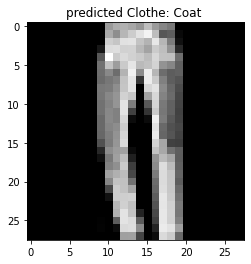

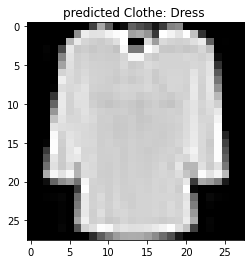

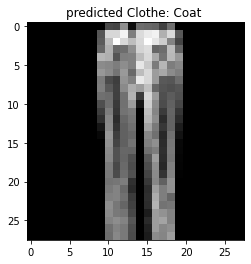

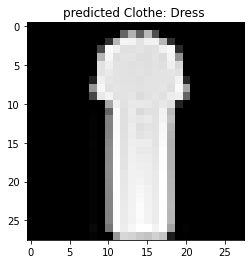

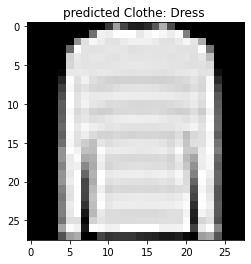

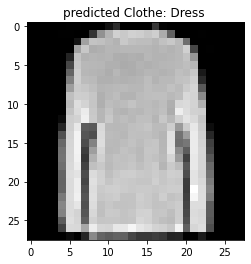

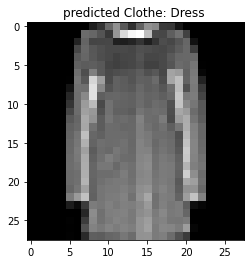

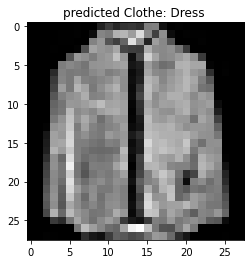

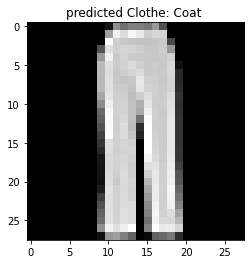

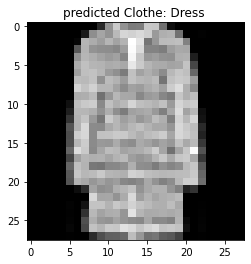

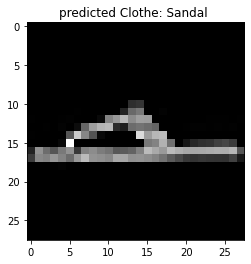

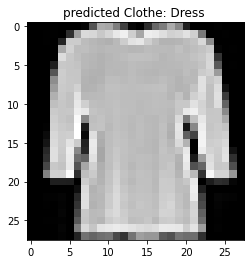

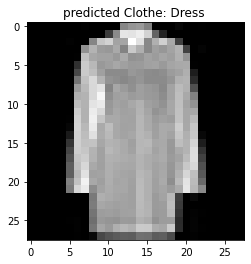

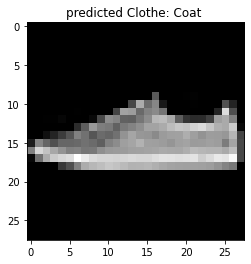

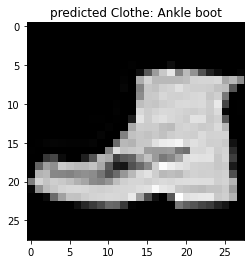

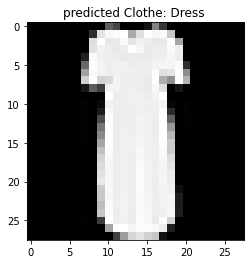

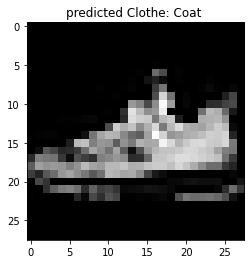

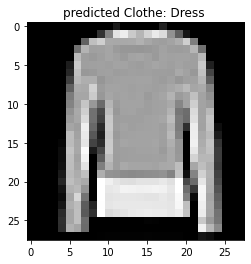

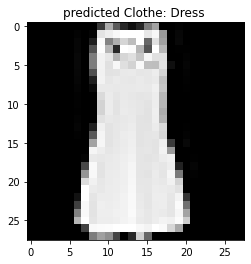

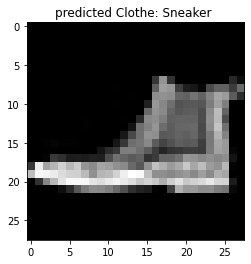

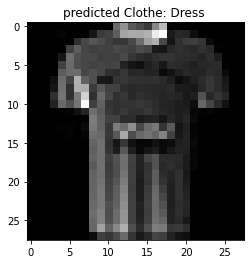

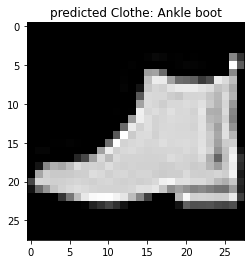

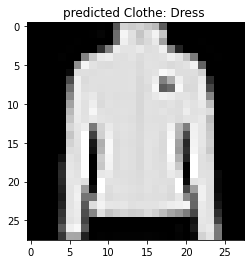

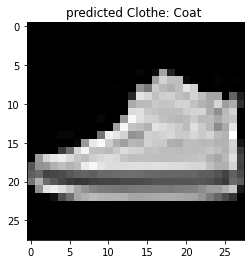

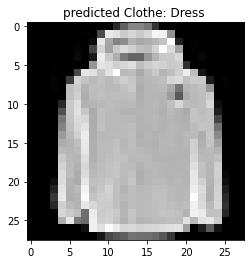

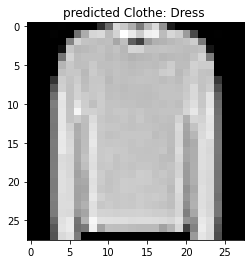

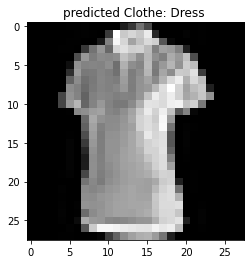

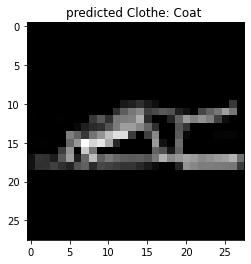

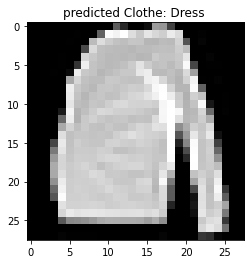

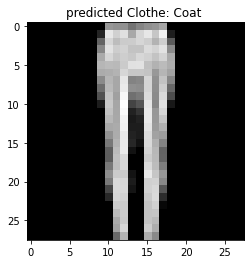

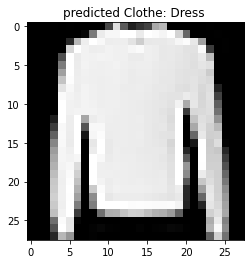

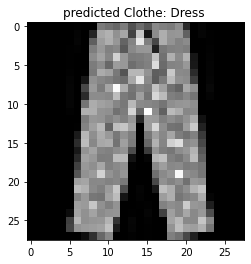

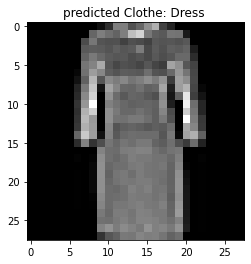

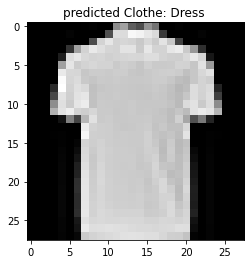

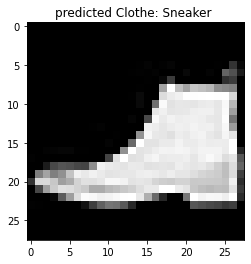

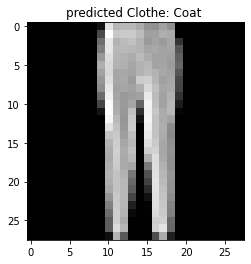

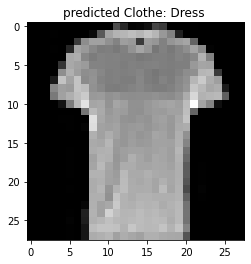

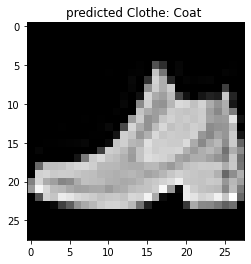

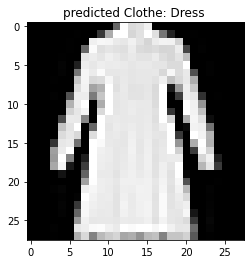

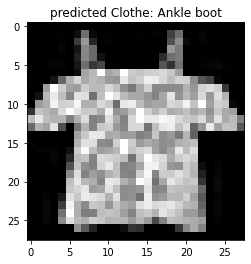

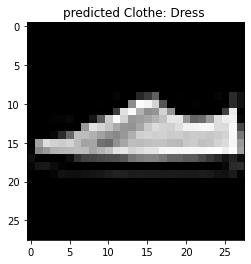

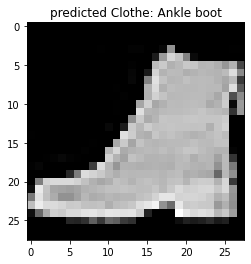

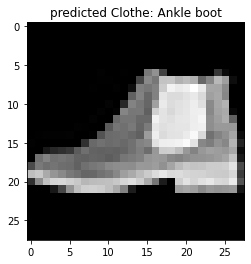

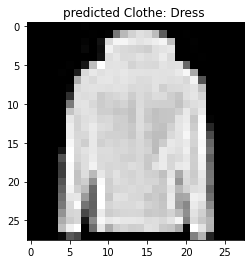

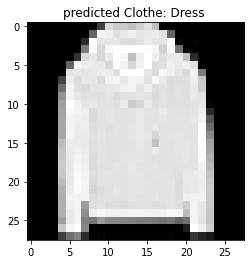

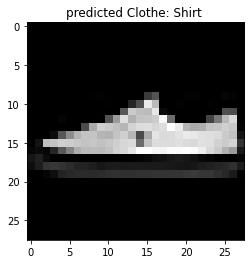

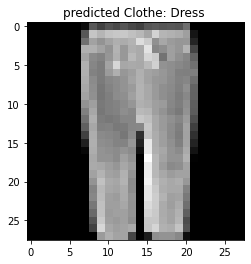

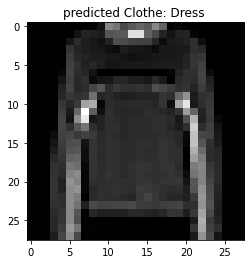

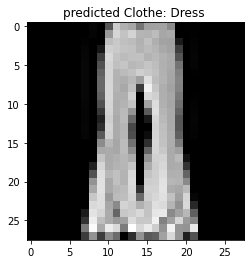

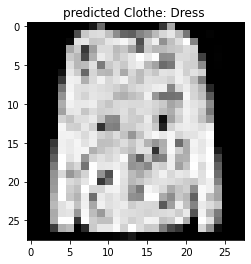

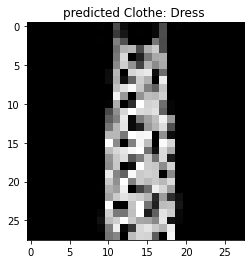

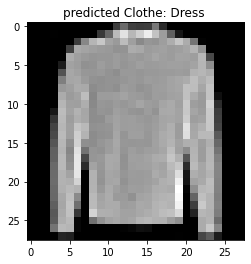

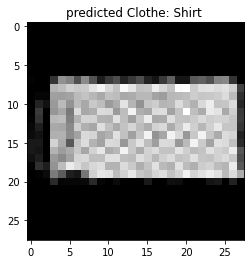

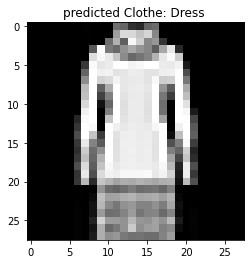

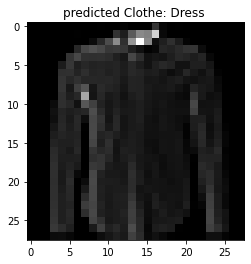

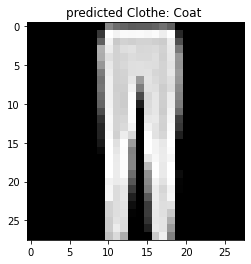

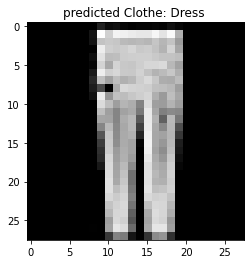

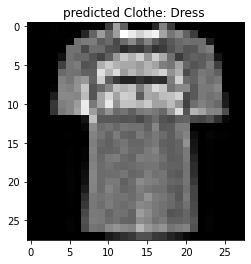

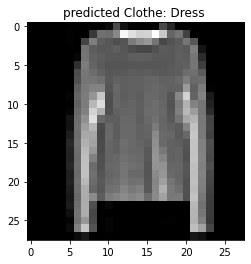

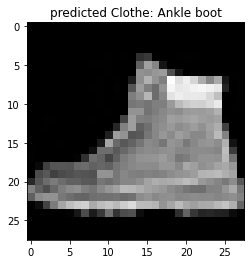

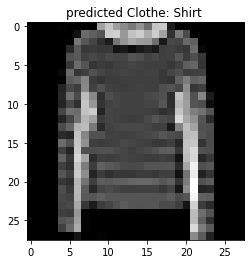

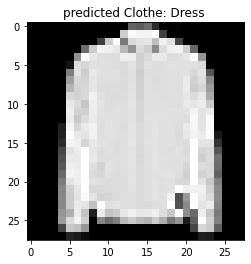

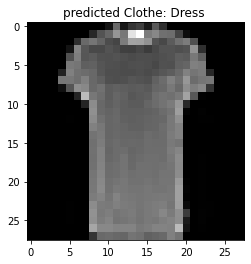

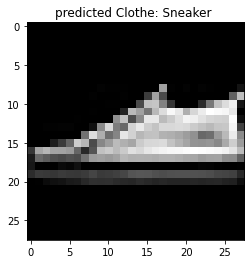

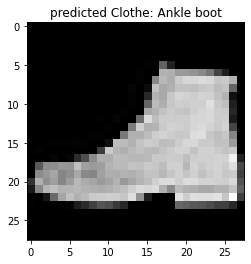

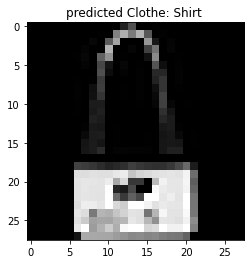

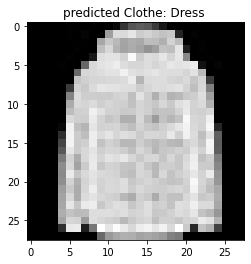

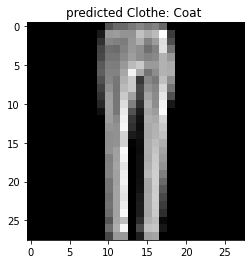

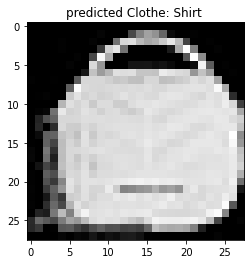

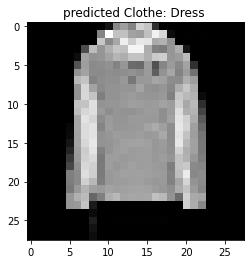

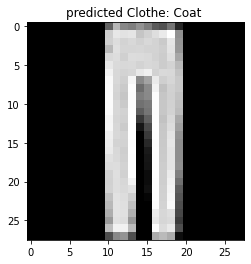

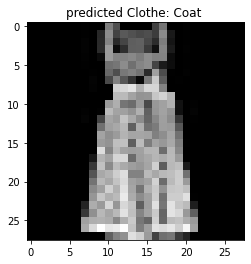

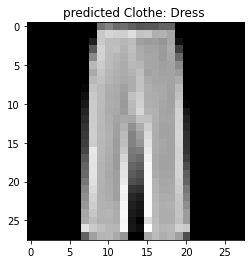

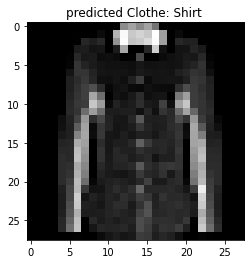

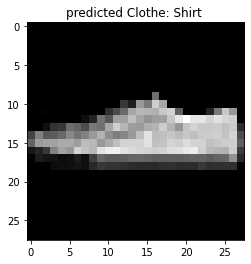

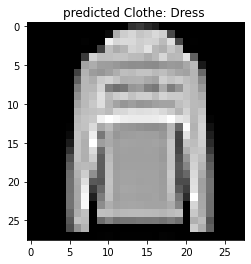

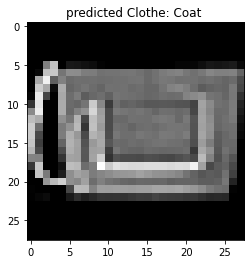

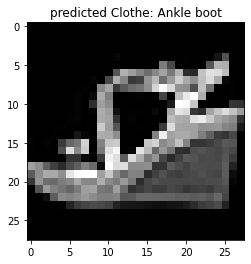

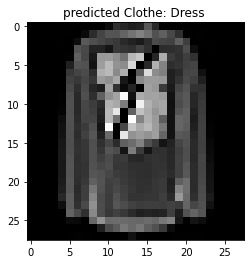

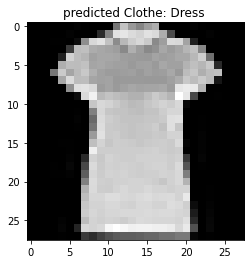

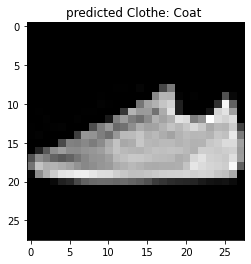

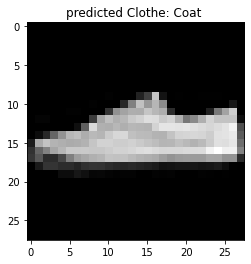

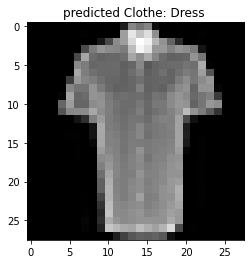

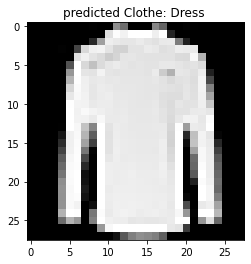

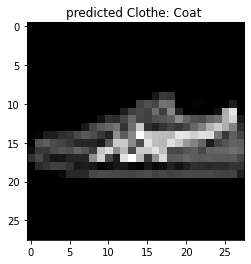

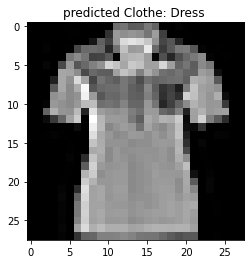

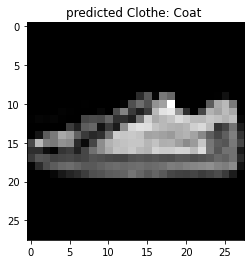

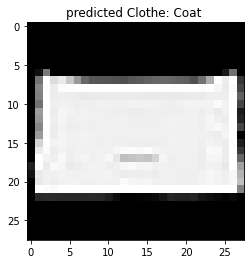

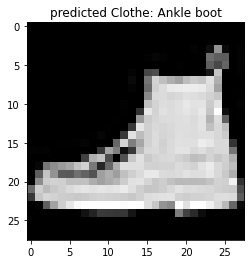

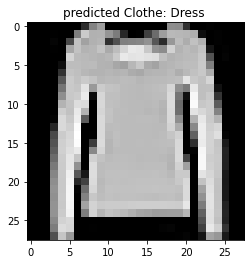

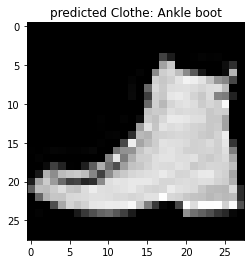

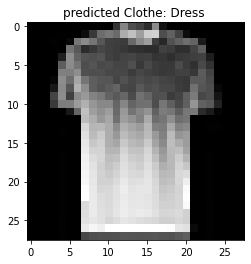

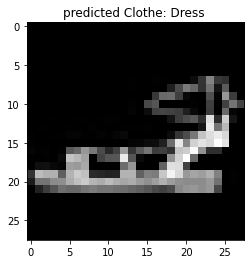

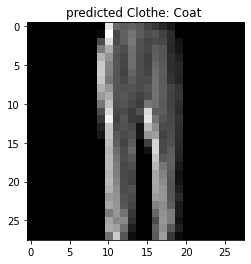

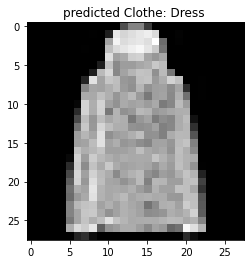

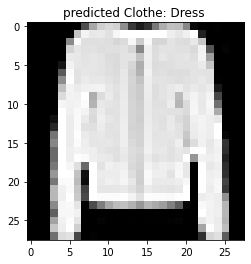

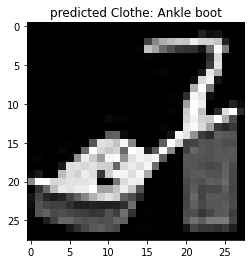

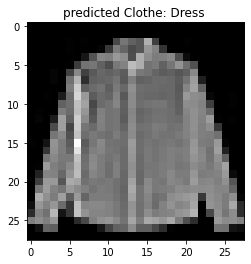

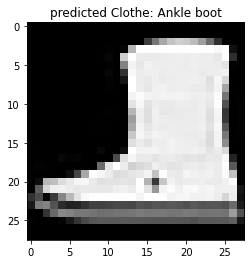

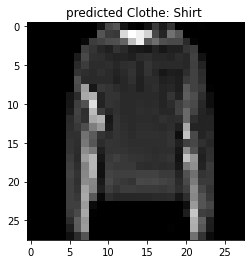

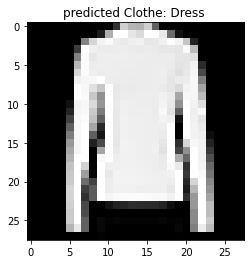

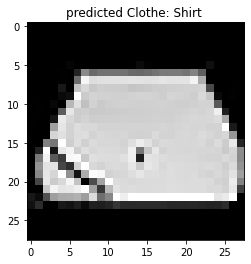

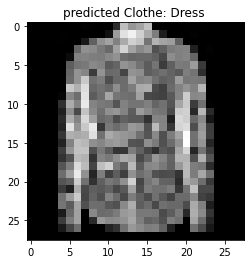

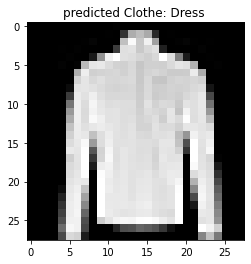

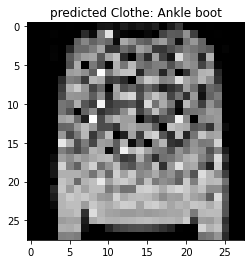

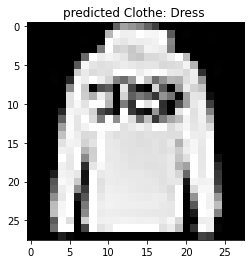

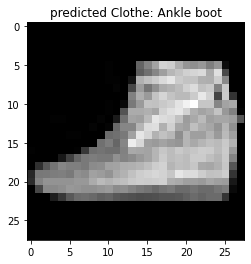

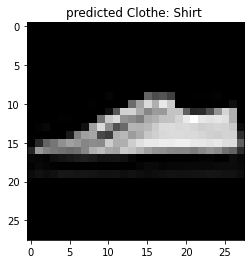

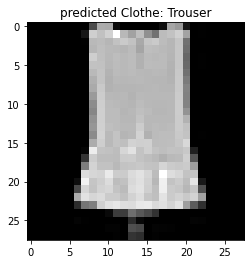

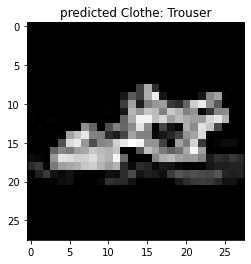

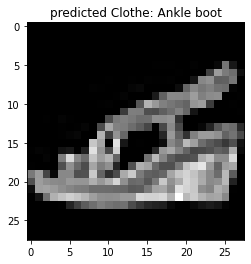

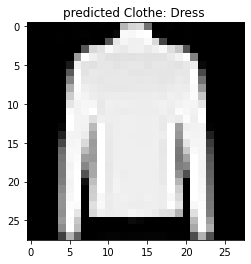

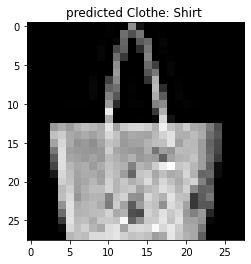

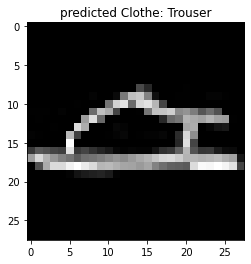

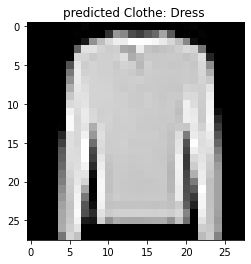

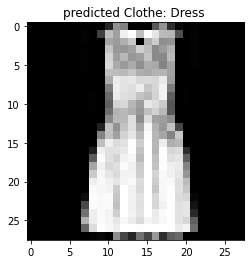

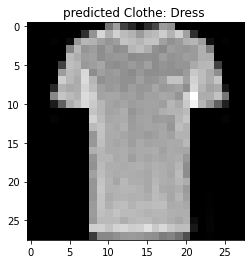

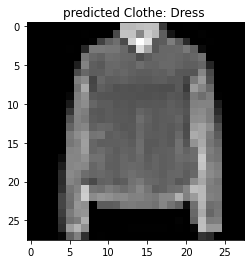

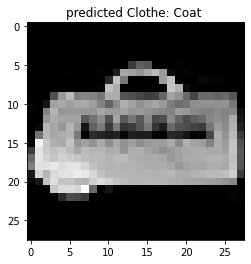

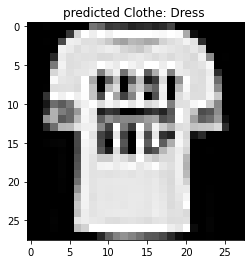

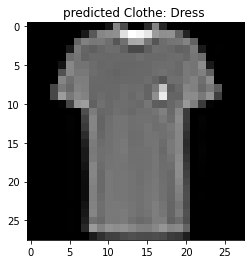

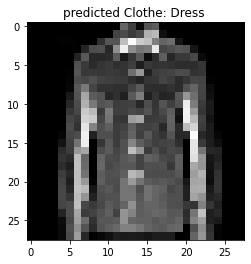

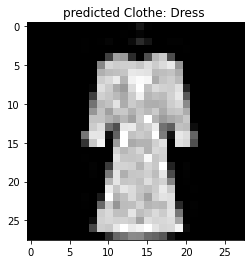

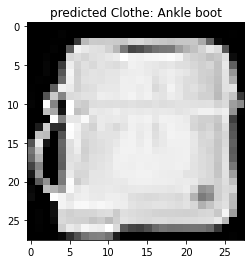

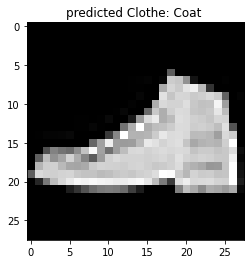

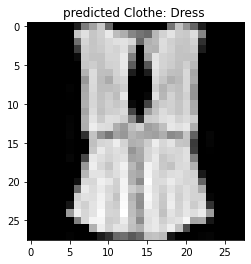

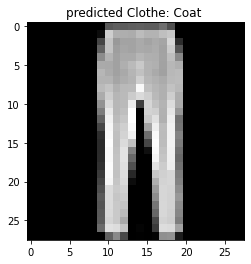

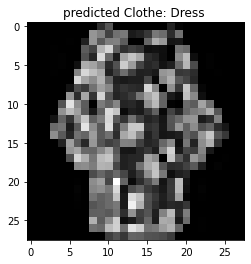

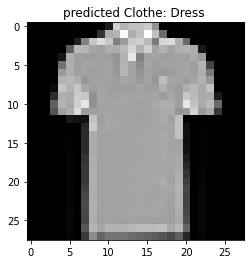

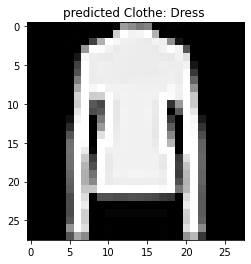

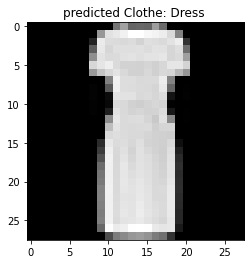

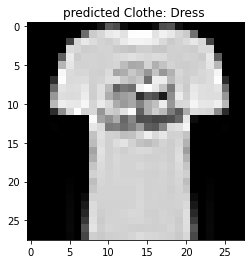

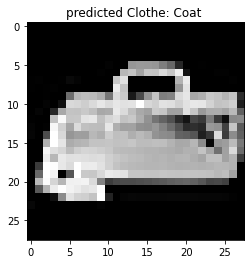

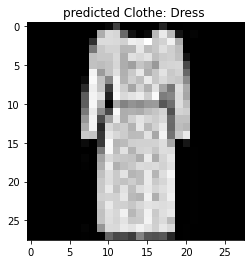

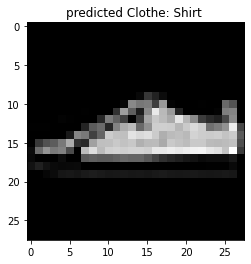

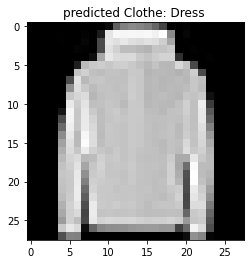

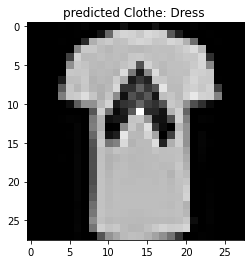

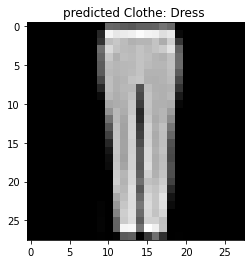

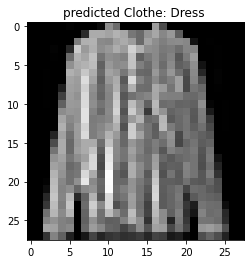

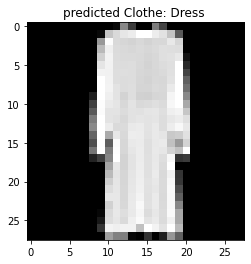

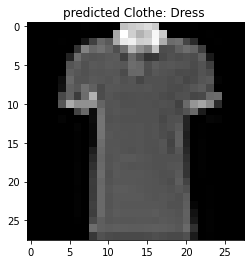

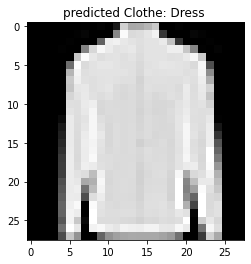

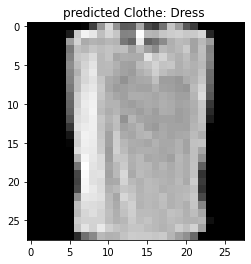

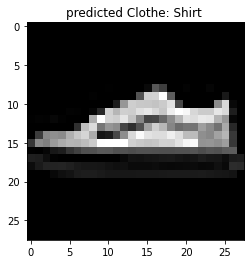

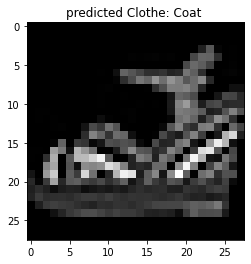

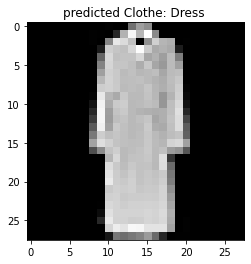

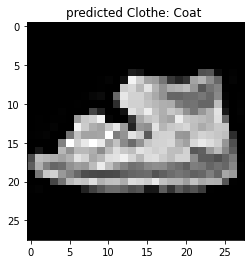

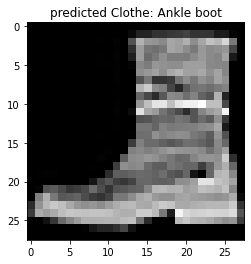

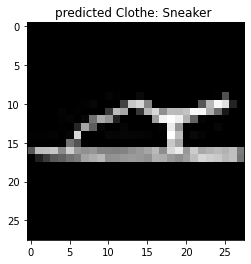

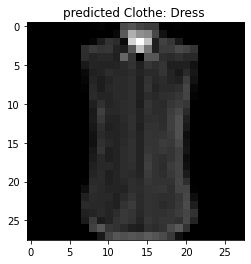

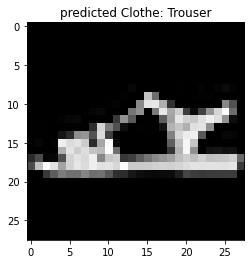

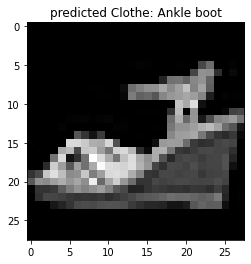

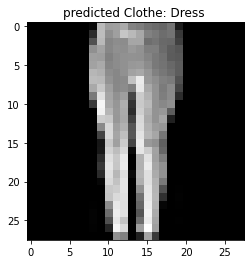

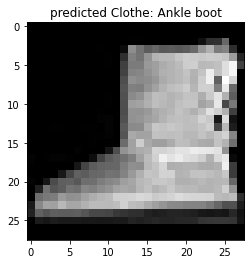

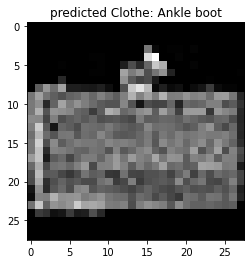

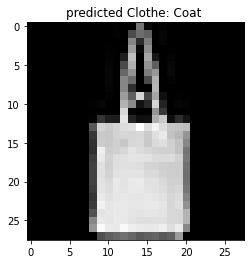

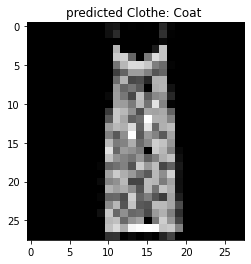

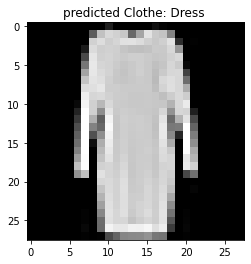

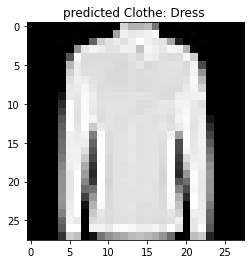

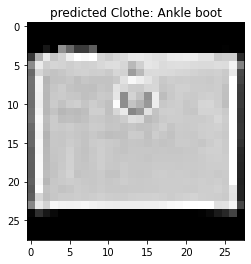

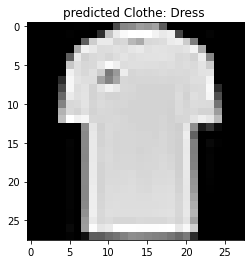

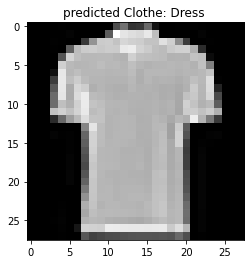

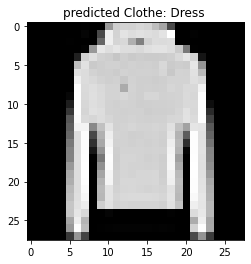

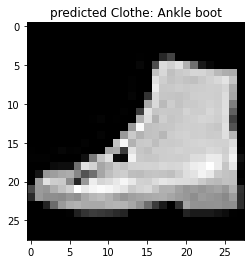

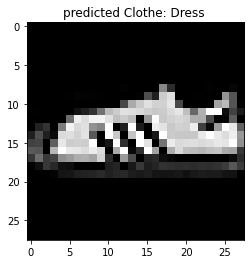

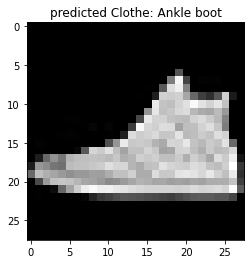

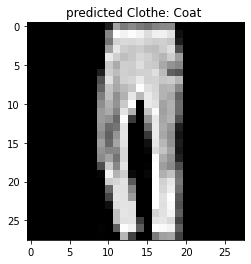

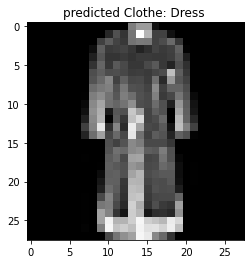

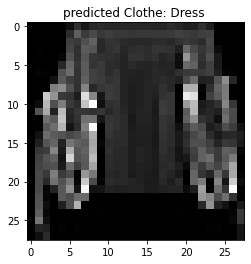

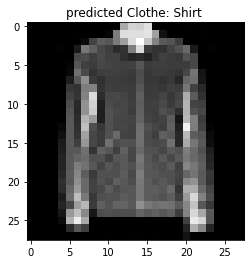

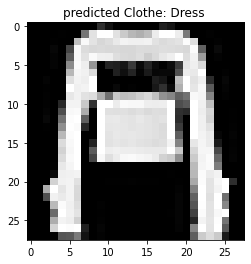

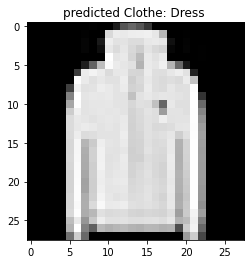

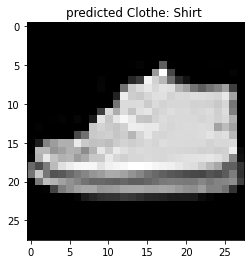

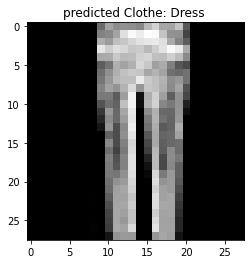

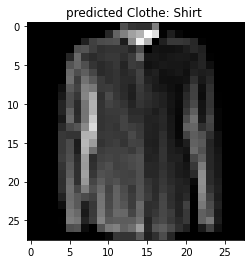

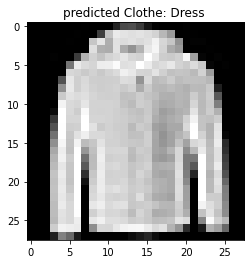

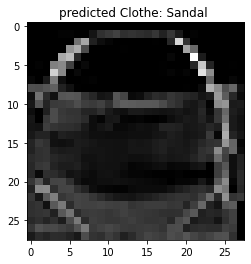

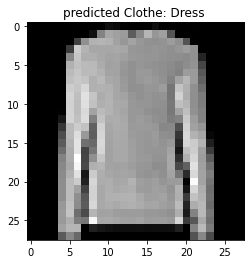

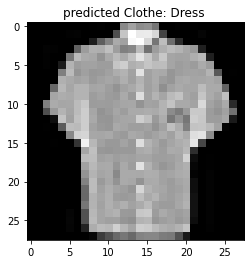

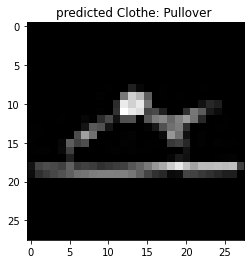

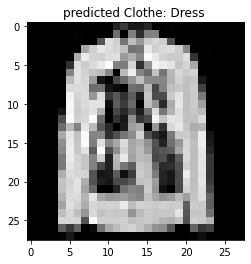

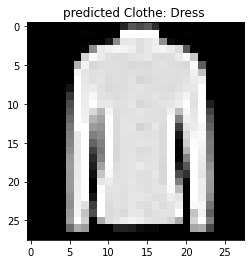

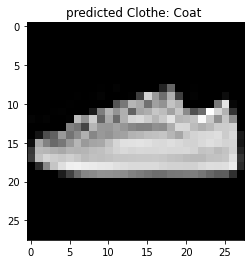

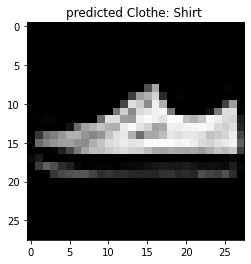

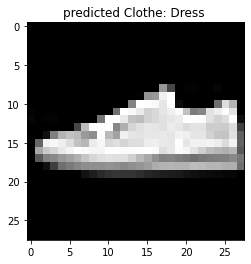

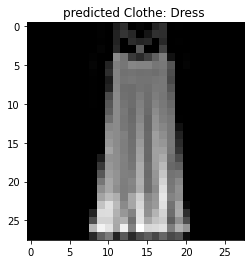

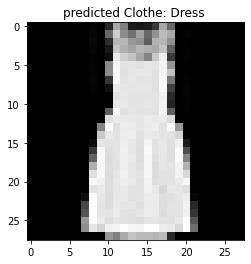

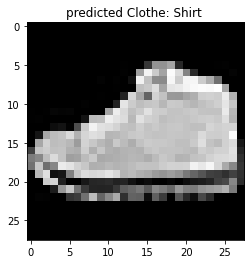

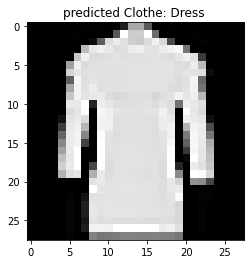

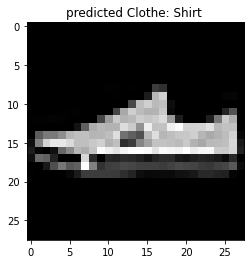

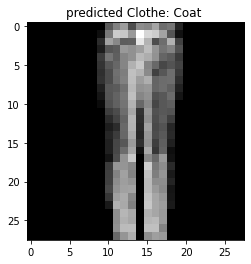

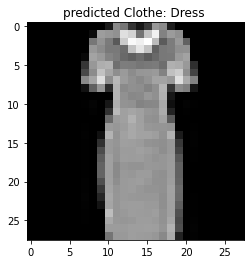

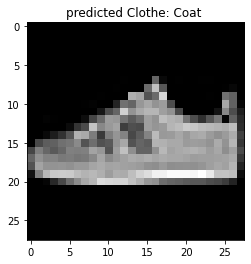

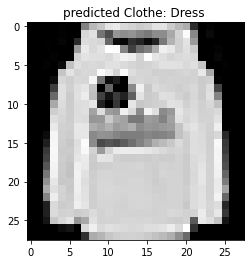

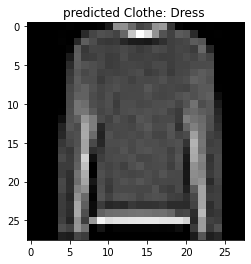

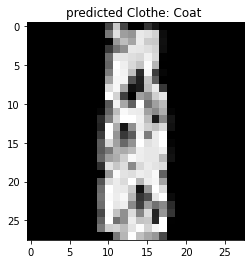

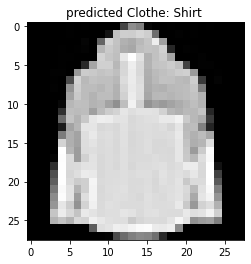

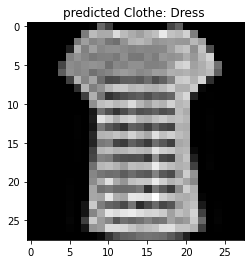

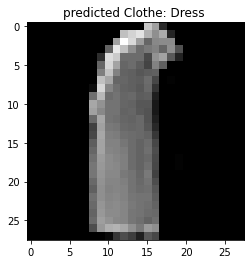

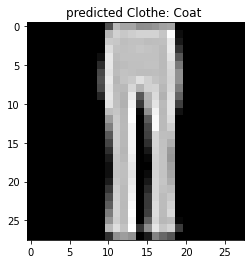

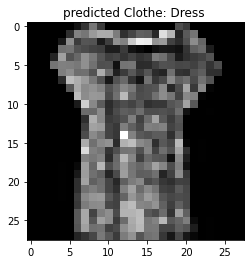

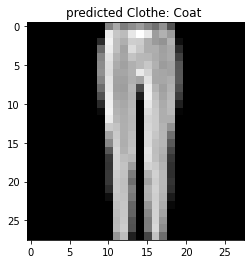

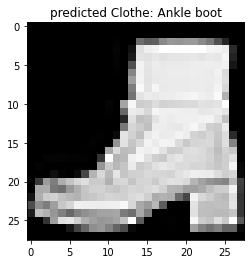

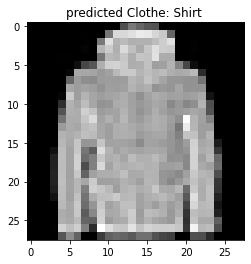

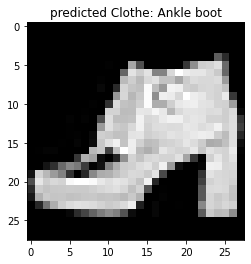

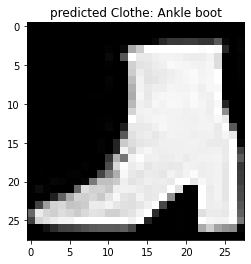

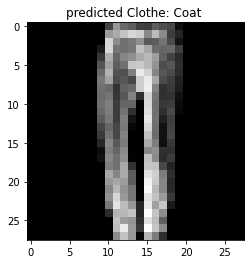

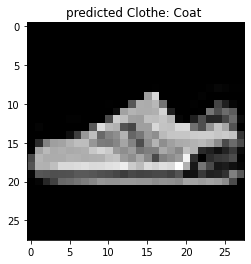

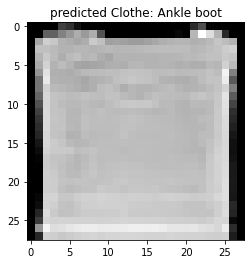

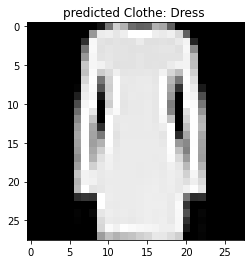

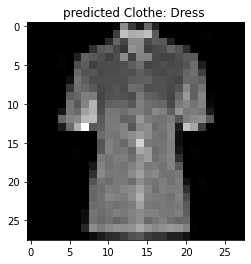

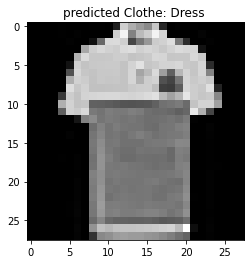

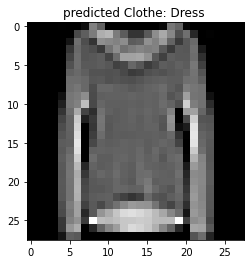

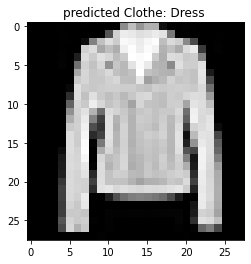

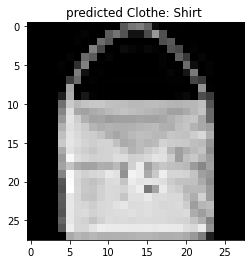

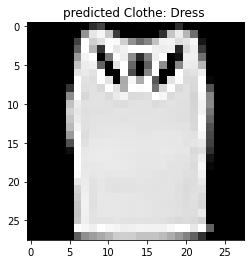

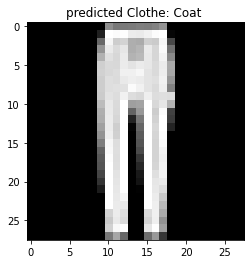

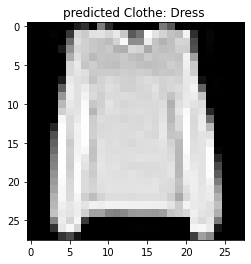

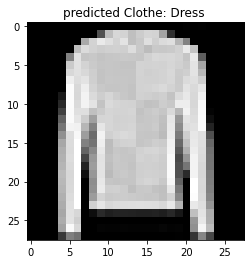

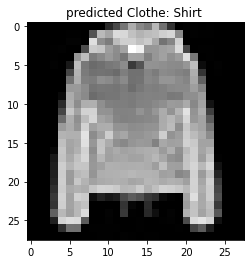

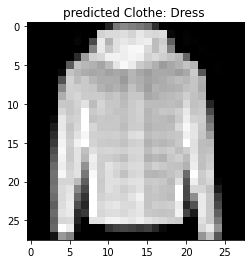

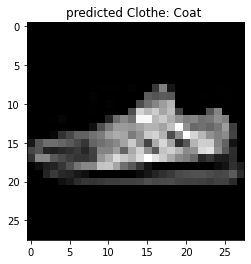

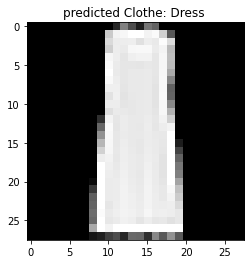

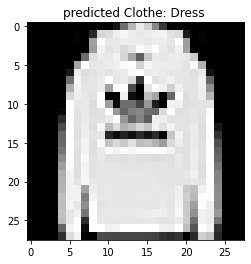

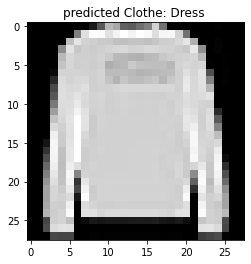

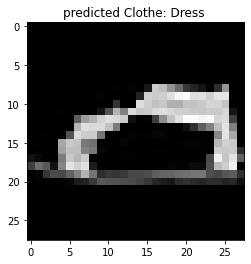

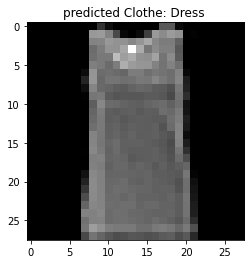

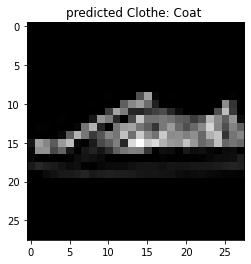

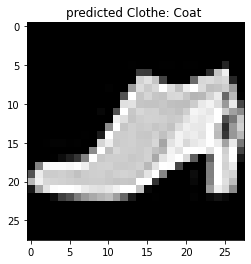

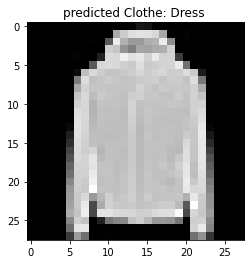

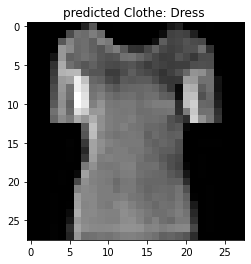

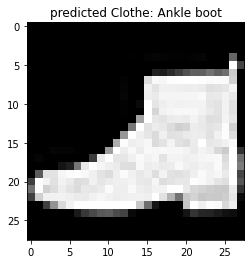

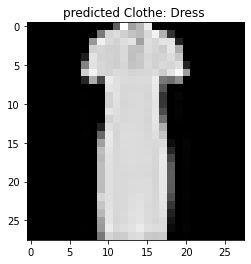

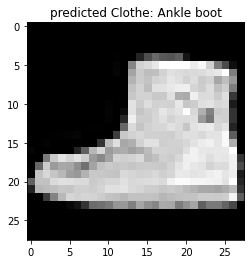

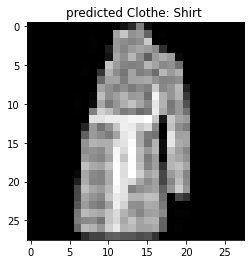

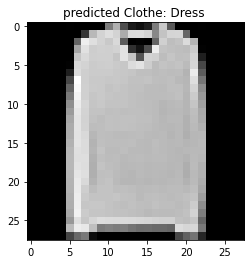

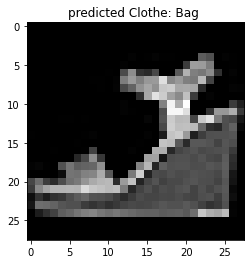

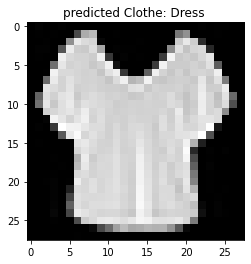

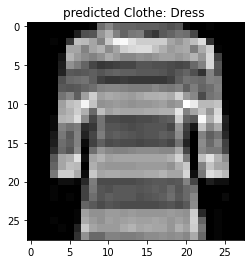

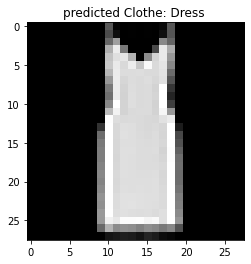

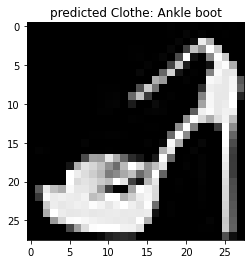

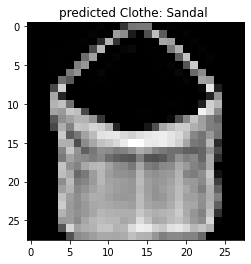

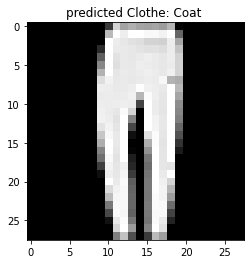

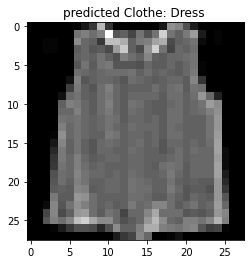

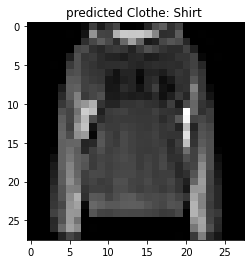

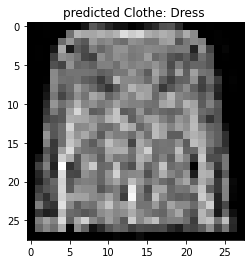

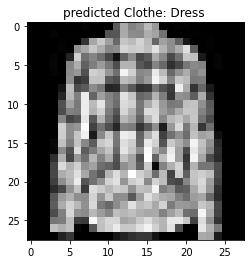

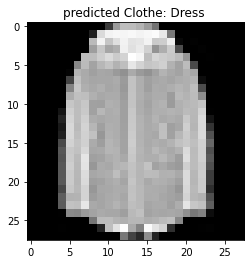

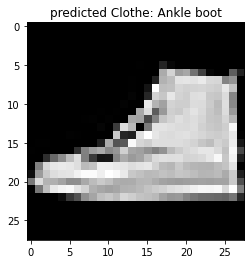

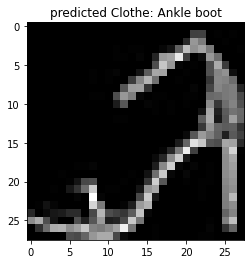

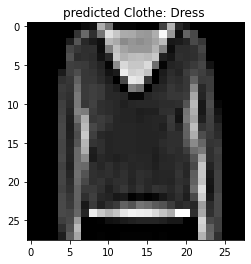

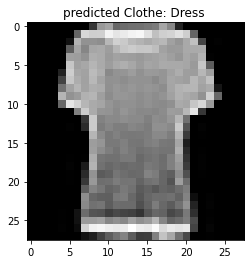

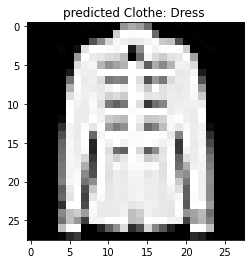

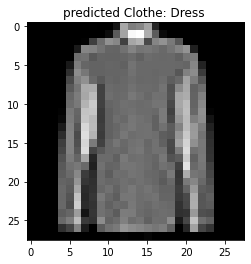

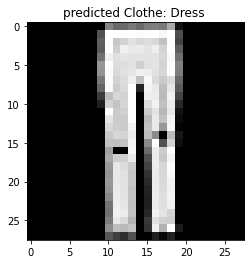

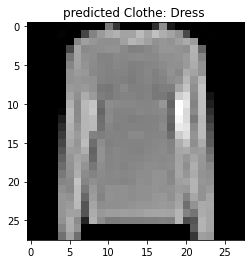

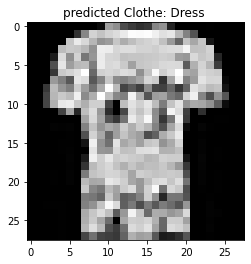

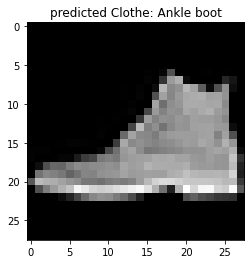

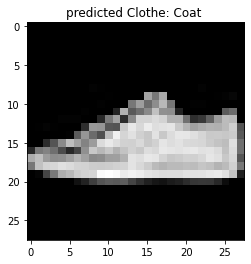

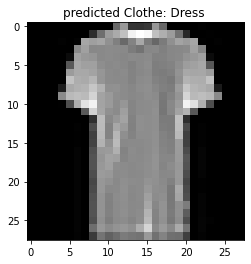

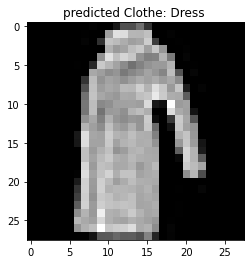

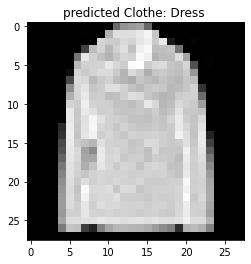

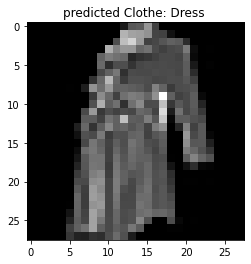

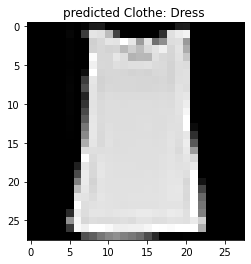

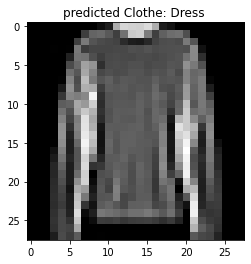

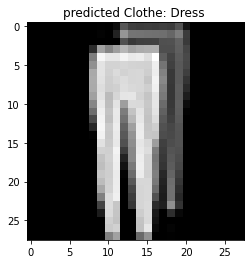

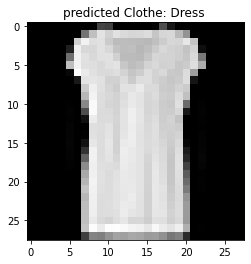

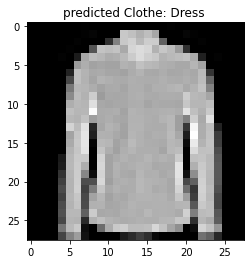

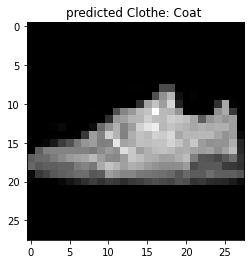

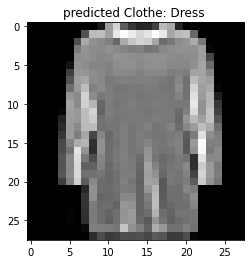

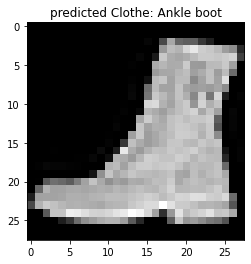

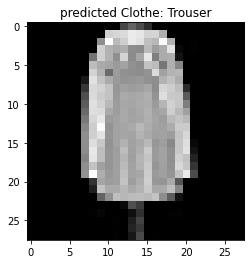

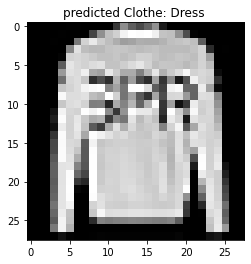

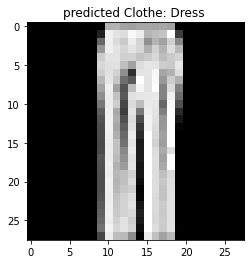

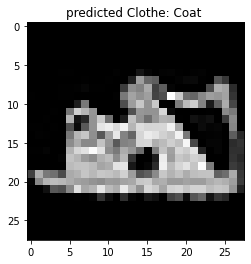

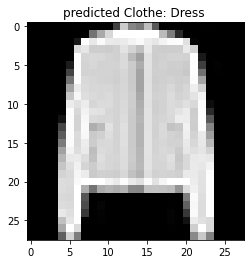

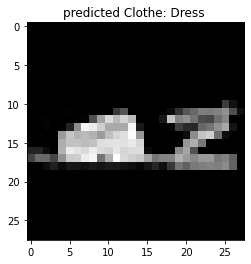

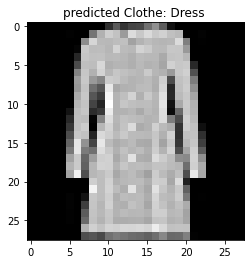

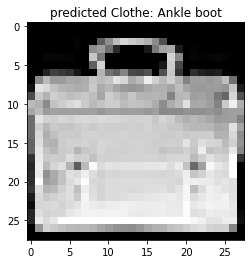

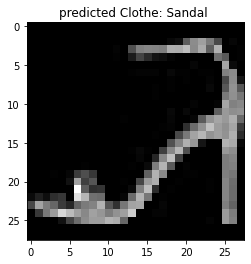

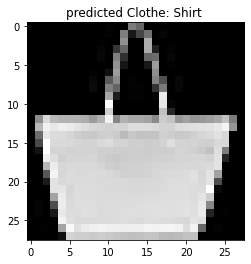

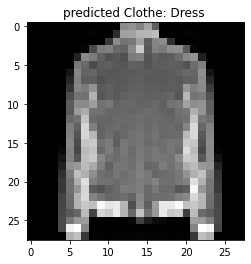

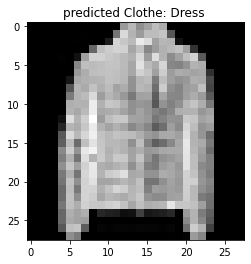

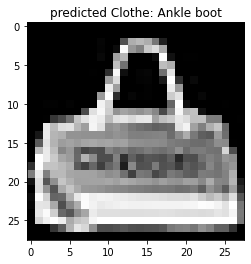

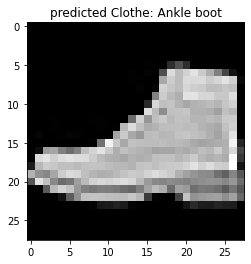

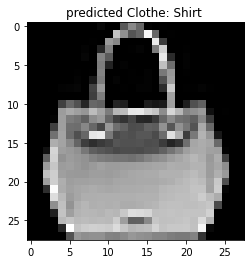

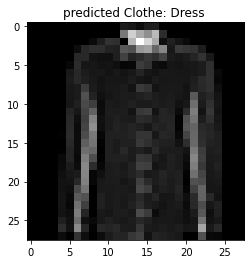

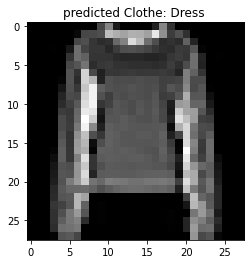

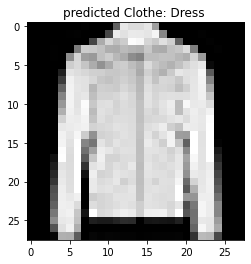

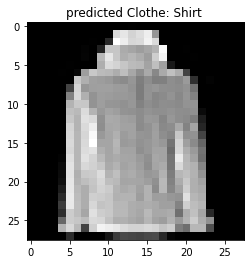

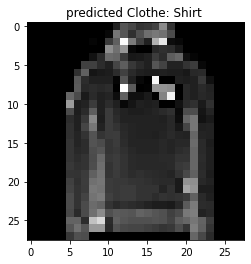

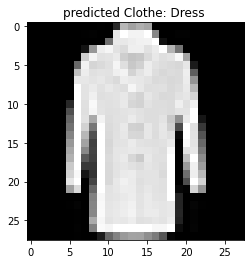

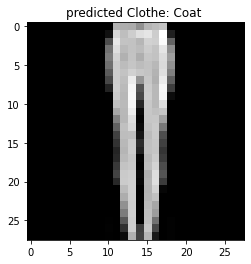

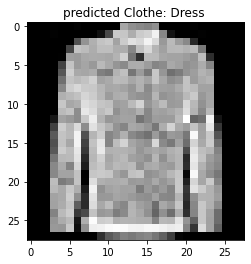

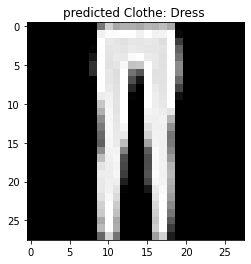

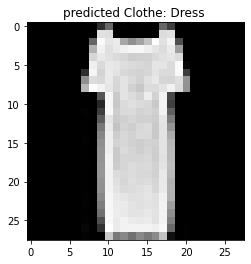

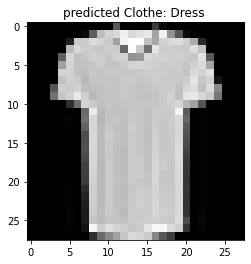

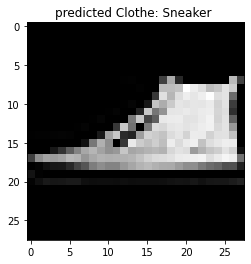

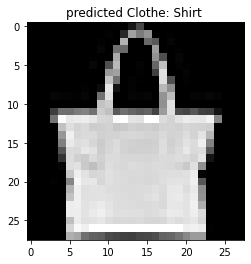

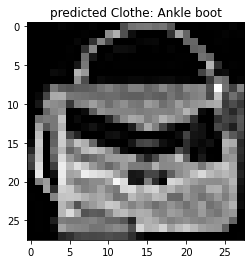

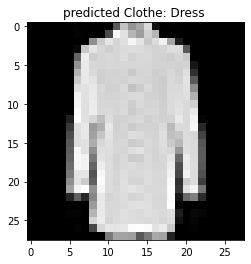

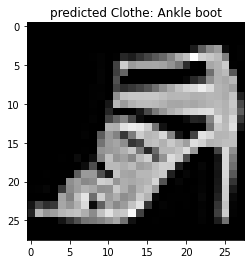

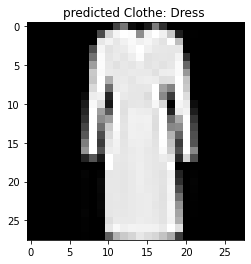

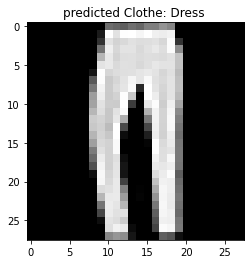

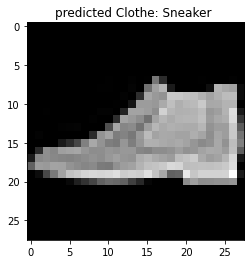

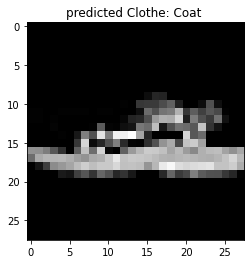

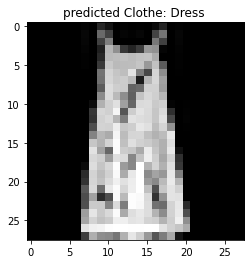

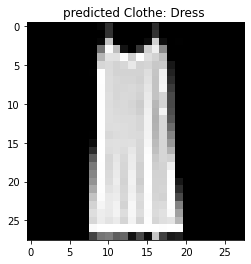

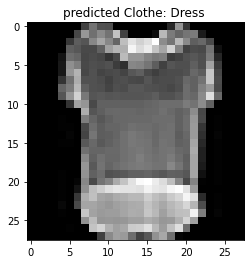

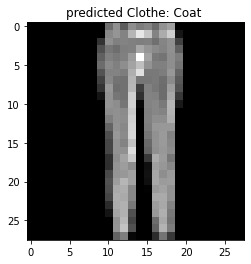

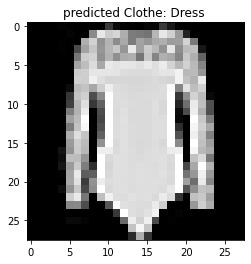

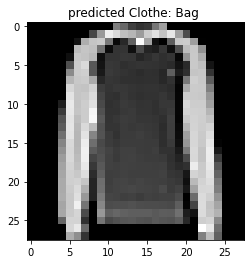

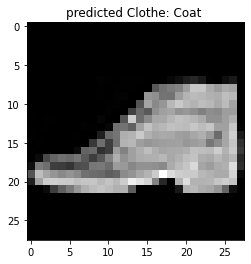

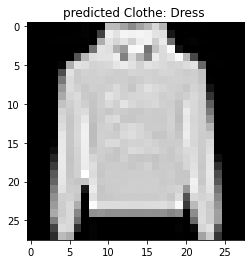

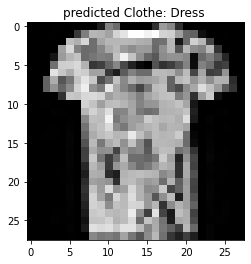

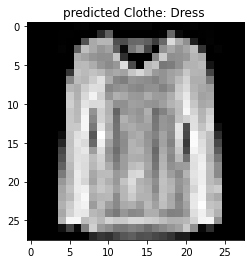

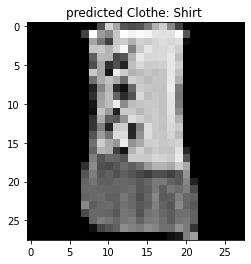

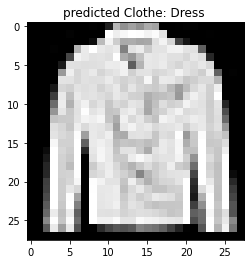

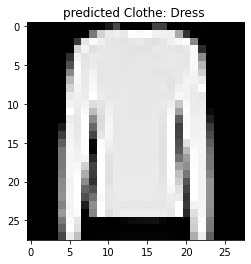

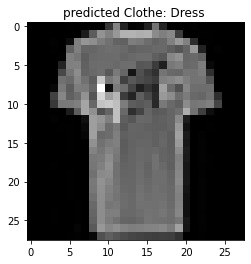

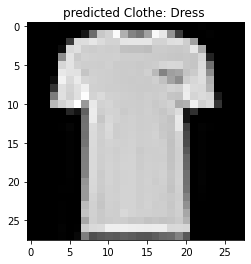

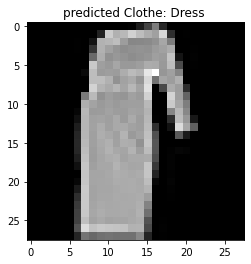

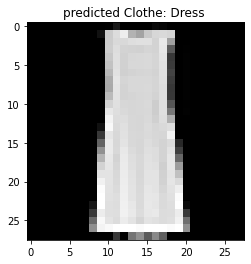

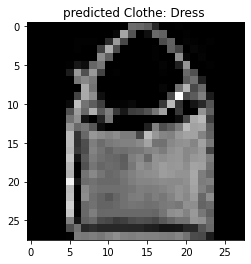

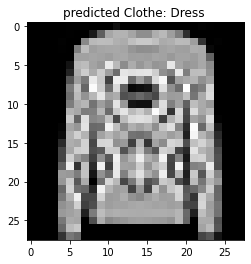

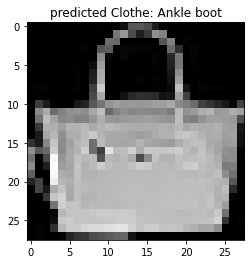

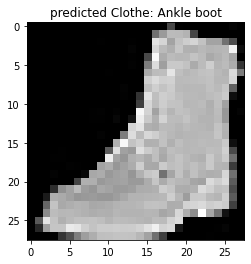

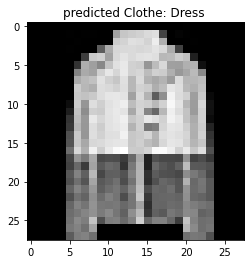

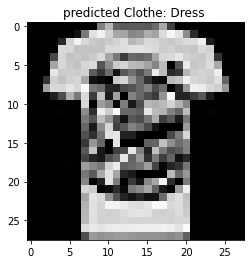

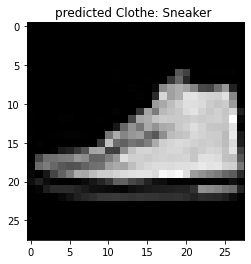

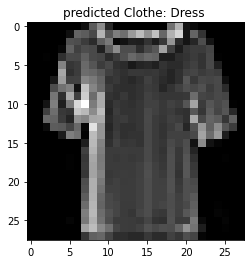

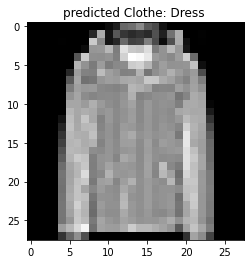

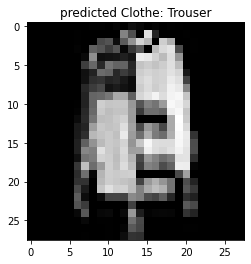

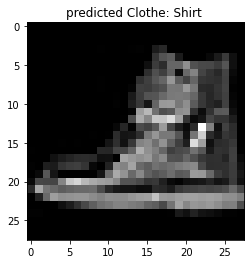

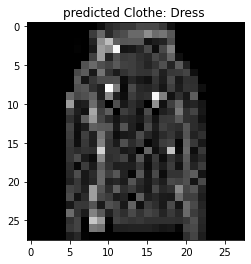

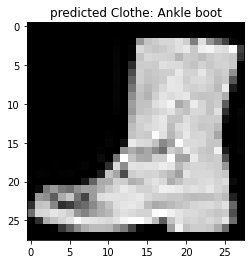

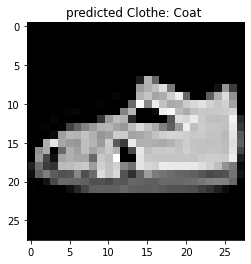

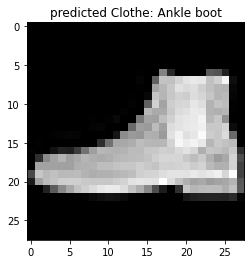

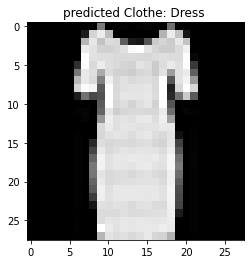

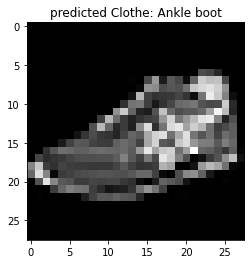

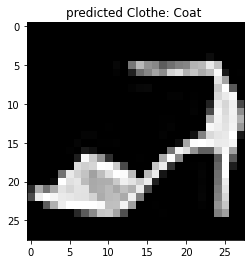

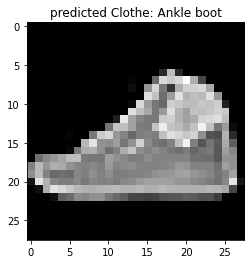

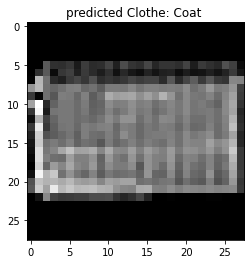

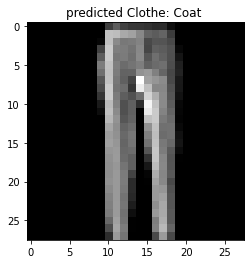

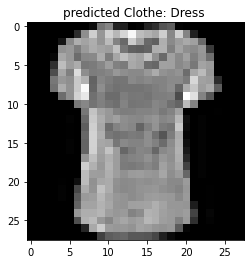

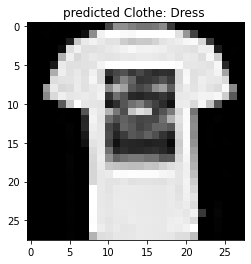

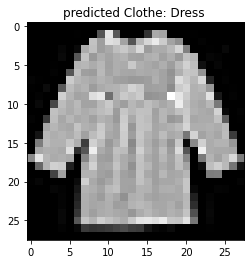

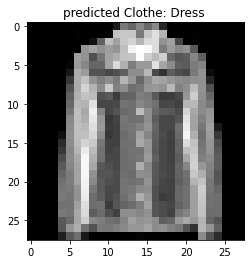

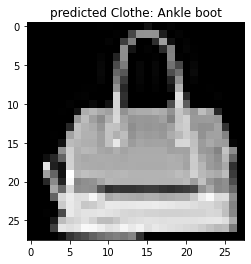

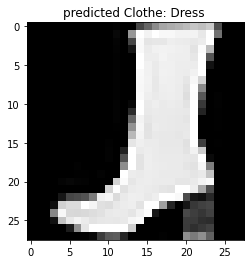

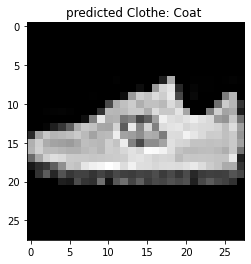

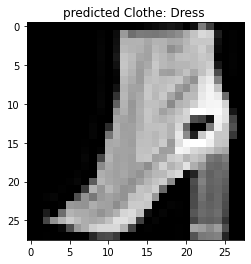

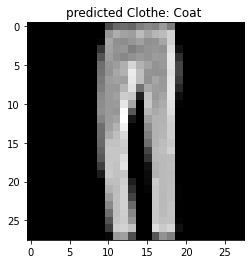

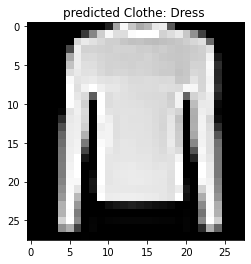

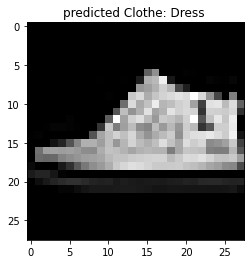

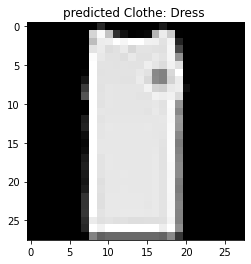

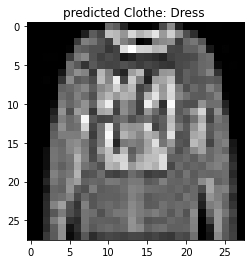

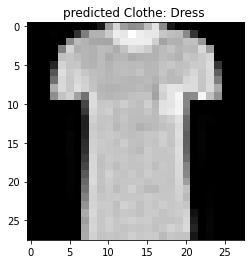

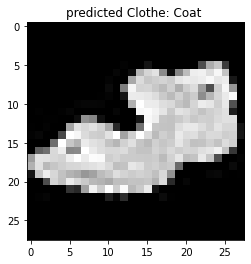

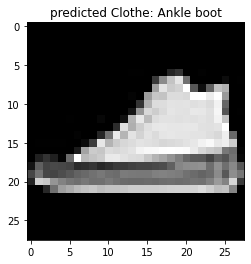

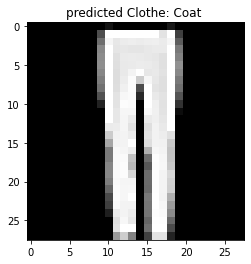

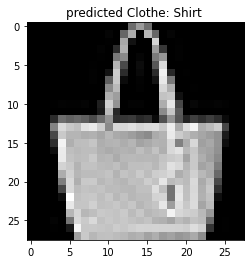

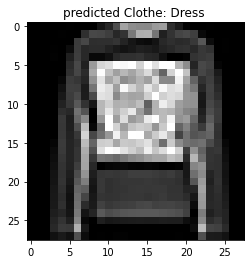

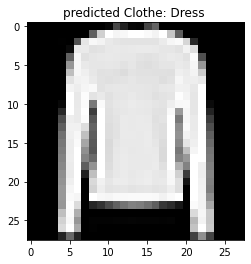

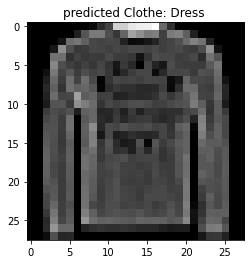

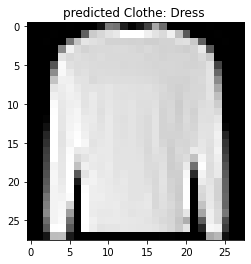

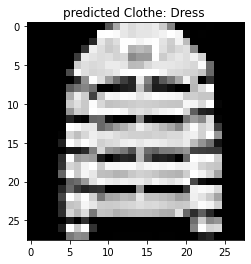

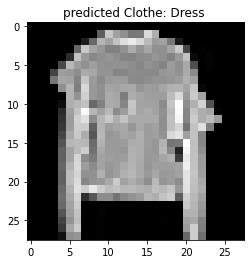

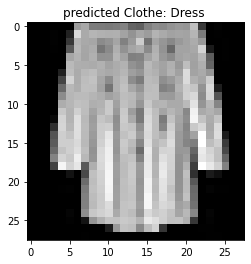

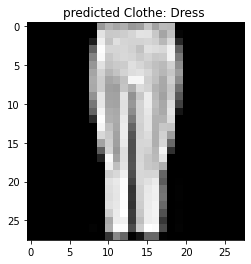

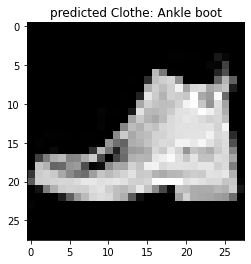

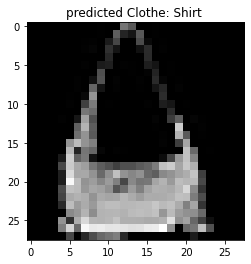

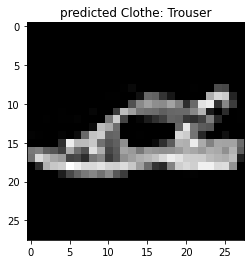

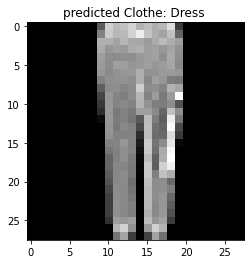

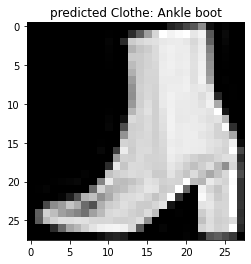

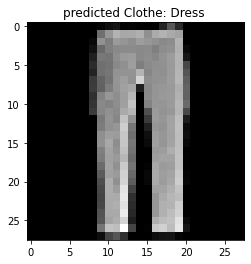

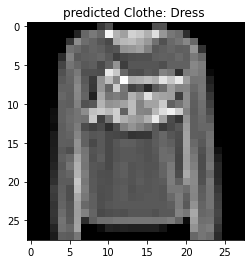

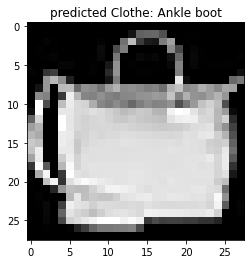

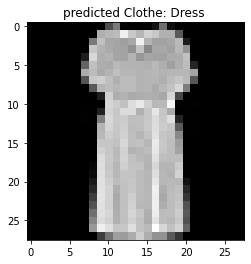

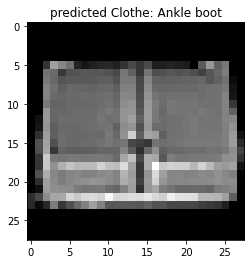

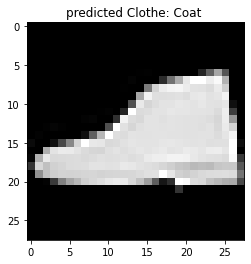

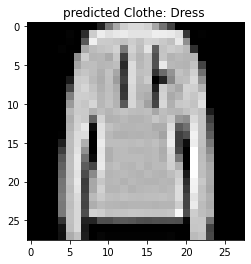

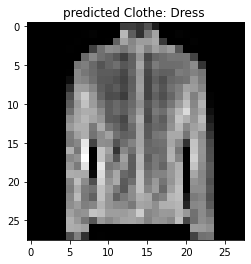

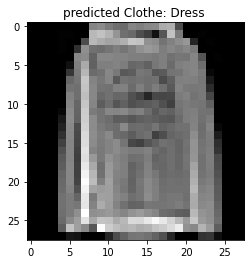

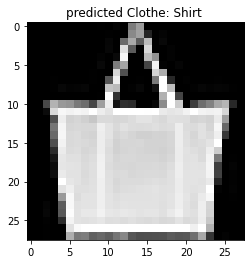

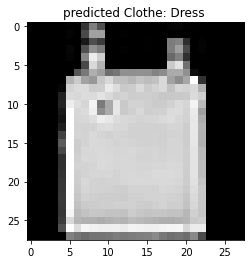

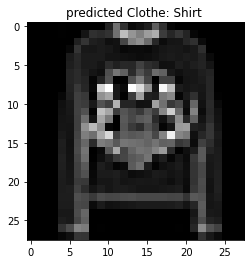

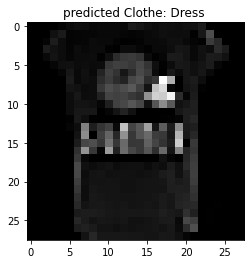

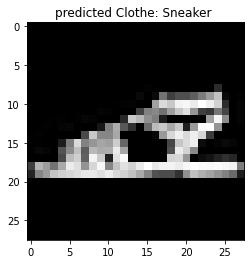

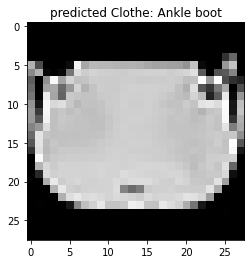

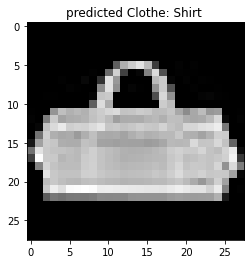

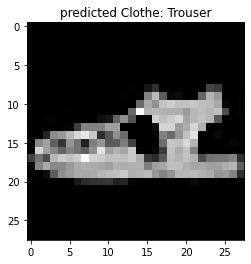

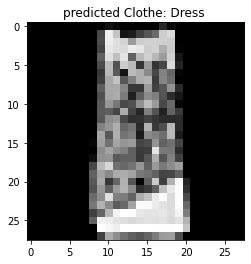

In [10]:
for (data, target) in test_dataset:

    data = data.view((-1, 28*28))
    data = data.view((-1, 28*28))

    output = torch.matmul(data, weights)
    softmax = F.softmax(output, dim = 1)
    prediction = softmax.argmax(dim = 1, keepdim = True)

    plt.imshow(data[0].view(28, 28), cmap='gray')
    plt.title(f"Predicted Clothe: {label_dic[prediction.item()]}")
    plt.show()


	This is a markdown cell for you to document your thought and research process